In [16]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import sys, shutil
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

data = StringIO("""
1619866801532,197,185,182,206,208,,,,,,,,,,,,,266,265,197,185,182,206,208,,,,,,,,,,,,,266,265
1619866801679,200,188,188,208,210,,,,,,,,,,,,,269,244,200,188,188,208,210,,,,,,,,,,,,,269,244
1619866802048,205,192,192,213,215,,,,,,,,,,,,,270,261,205,192,192,213,215,,,,,,,,,,,,,270,261
1619866802161,204,190,190,212,212,,,,,,,,,,,,,269,262,204,190,190,212,212,,,,,,,,,,,,,269,262
1619866802294,192,175,177,195,198,,,,,,,,,,,,,273,260,192,175,177,195,198,,,,,,,,,,,,,273,260
1619866802428,178,164,164,185,190,,,,,,,,,,,,,133,258,178,164,164,185,190,,,,,,,,,,,,,133,258
1619866802630,172,149,149,170,171,,,,,,,,,,,,,276,260,172,149,149,170,171,,,,,,,,,,,,,276,260
1619866802836,148,118,121,129,141,,,,,,,,,,,,,256,252,148,118,121,129,141,,,,,,,,,,,,,256,252
1619866802977,141,115,119,130,141,,,,,,,,,,,,,251,250,141,115,119,130,141,,,,,,,,,,,,,251,250
1619866803108,135,114,118,137,147,,,,,,,,,,,,,251,251,135,114,118,137,147,,,,,,,,,,,,,251,251
1619866803231,137,122,122,140,155,,,,,,,,,,,,,252,258,137,122,122,140,155,,,,,,,,,,,,,252,258
1619866803371,151,136,138,160,163,252,,,,,,,,,,,,263,258,151,136,138,160,163,252,,,,,,,,,,,,263,258
1619866803492,173,160,163,185,192,,,,,,,,,,,,,267,259,173,160,163,185,192,,,,,,,,,,,,,267,259
1619866803611,170,160,160,189,190,,,,,,,,,,,,,255,255,170,160,160,189,190,,,,,,,,,,,,,255,255
1619866803749,172,164,162,194,192,,,,,,,,,,,,,261,256,172,164,162,194,192,,,,,,,,,,,,,261,256
1619866803891,174,165,165,195,193,,,,,,,,,,,,,269,258,174,165,165,195,193,,,,,,,,,,,,,269,258
1619866804058,162,155,154,181,,254,,,,,,,,,,,,263,251,162,155,154,181,,254,,,,,,,,,,,,263,251
1619866804187,156,148,146,178,172,252,,,,,,,,,,,,244,258,156,148,146,178,172,252,,,,,,,,,,,,244,258
1619866804318,156,148,143,185,,,,,,,,,,,,,,264,253,156,148,143,185,,,,,,,,,,,,,,264,253
1619866804453,151,144,138,169,155,,,,,,,,,,,,,250,258,151,144,138,169,155,,,,,,,,,,,,,250,258
1619866804587,172,164,161,187,172,,,,,,,,,,,,,270,255,172,164,161,187,172,,,,,,,,,,,,,270,255
1619866804735,176,171,167,202,,,,,,,,,,,,,,274,256,176,171,167,202,,,,,,,,,,,,,,274,256
1619866804869,162,160,153,187,171,,,,,,,,,,,,,262,256,162,160,153,187,171,,,,,,,,,,,,,262,256
1619866805001,183,179,174,,198,,,,,,,,,,,,,269,224,183,179,174,,198,,,,,,,,,,,,,269,224
1619866805121,183,177,172,,199,,,,,,,,,,,,,266,259,183,177,172,,199,,,,,,,,,,,,,266,259
1619866805242,199,193,185,203,196,,,,,,,,,,,,,272,262,199,193,185,203,196,,,,,,,,,,,,,272,262
1619866805372,,174,171,,,,,,,,,,,,,,,277,258,,174,171,,,,,,,,,,,,,,,277,258
1619866805496,191,187,181,,191,,,,,,,,,,,,,252,265,191,187,181,,191,,,,,,,,,,,,,252,265
1619866805626,,190,181,,,,,,,,,,,,,,,251,216,,190,181,,,,,,,,,,,,,,,251,216
1619866805749,,,,,,,,,,,,,,,,,,196,263,,,,,,,,,,,,,,,,,,196,263
1619866805885,,188,,,,,,,,,,,,,,,,214,261,,188,,,,,,,,,,,,,,,,214,261
1619866806008,,,,,,,,,,,,,,,,,,164,264,,,,,,,,,,,,,,,,,,164,264
1619866806117,,,,,,,,,,,,,,,,,,168,256,,,,,,,,,,,,,,,,,,168,256
1619866806232,,,,,,,,,,,,,,,,,,119,242,,,,,,,,,,,,,,,,,,119,242
1619866806364,,,,,,,,,,,,,,,,,,93,165,,,,,,,,,,,,,,,,,,93,165
1619866806509,,65,70,69,,,,,,,,,,,,,,172,202,,65,70,69,,,,,,,,,,,,,,172,202
1619866806660,51,24,,,,,,,,,,,,,,,,137,265,51,24,,,,,,,,,,,,,,,,137,265
1619866806805,,,,,,97,,,,,,,,,,,,94,229,,,,,,97,,,,,,,,,,,,94,229
1619866807002,,,,,,7,,,,,,,,,,,,,145,,,,,,7,,,,,,,,,,,,,145
1619866807133,,,,,,,,,,,,,,,,,,105,75,,,,,,,,,,,,,,,,,,105,75
1619866807255,,,,,,,,,,,,,,,,,,102,141,,,,,,,,,,,,,,,,,,102,141
1619866807386,,,,,,,,,,,,,,,,,,34,30,,,,,,,,,,,,,,,,,,34,30
1619866807509,,,,,,,,,,,,,,,,,,143,,,,,,,,,,,,,,,,,,,143,
1619866807676,,,,,,,,,,,,,,,,,,144,,,,,,,,,,,,,,,,,,,144,
1619866807807,,,,,,,,,,,,,,,,,,128,23,,,,,,,,,,,,,,,,,,128,23
1619866807949,,,,,,,,,,,,,,,,,,11,,,,,,,,,,,,,,,,,,,11,
1619866808088,,,,,,,,40,,,,,,,,,,15,2,,,,,,,,40,,,,,,,,,,15,2
1619866808215,,,,,,,,56,,,,,,,,,,,,,,,,,,,56,,,,,,,,,,,
1619866808347,,,,,,,,65,,,68,-3,-2,,93,,,,,,,,,,,,65,,,68,-3,-2,,93,,,,
1619866808465,,,,,,,,,,50,54,-1,-2,103,85,,,59,,,,,,,,,,,50,54,-1,-2,103,85,,,59,
1619866808604,,,,,,,,,,40,56,,17,130,94,208,210,,20,,,,,,,,,,40,56,,17,130,94,208,210,,20
1619866808726,,,,,,,,-1,6,40,66,31,30,138,104,222,233,,30,,,,,,,,-1,6,40,66,31,30,138,104,222,233,,30
1619866808848,,,,,,,,9,12,41,63,38,39,132,112,222,229,,38,,,,,,,,9,12,41,63,38,39,132,112,222,229,,38
1619866808971,,,,,,,,14,14,48,53,42,41,127,117,225,218,,41,,,,,,,,14,14,48,53,42,41,127,117,225,218,,41
1619866809089,,,,,,-7,-8,23,14,70,69,51,51,131,128,223,213,,51,,,,,,-7,-8,23,14,70,69,51,51,131,128,223,213,,51
1619866809209,,,,,,-5,-9,33,22,79,57,58,57,141,142,223,213,,57,,,,,,-5,-9,33,22,79,57,58,57,141,142,223,213,,57
1619866809340,,,,,,-2,-5,43,33,65,66,65,65,144,147,224,221,,65,,,,,,-2,-5,43,33,65,66,65,65,144,147,224,221,,65
1619866809475,,,,,,3,4,42,45,75,77,71,73,145,150,224,218,3,72,,,,,,3,4,42,45,75,77,71,73,145,150,224,218,3,72
1619866809617,,,,,,4,8,44,52,78,89,76,79,143,147,217,221,6,77,,,,,,4,8,44,52,78,89,76,79,143,147,217,221,6,77
1619866809745,-7,-11,-11,,-9,13,17,48,57,81,94,78,80,144,146,212,220,15,79,-7,-11,-11,,-9,13,17,48,57,81,94,78,80,144,146,212,220,15,79
1619866809890,-4,-9,-8,,-7,16,19,51,60,84,95,81,82,147,152,212,221,17,81,-4,-9,-8,,-7,16,19,51,60,84,95,81,82,147,152,212,221,17,81
1619866810017,-2,-6,-6,-5,-6,21,21,51,58,86,96,81,82,147,149,210,218,21,81,-2,-6,-6,-5,-6,21,21,51,58,86,96,81,82,147,149,210,218,21,81
1619866810137,0,-4,-4,-1,-2,24,23,54,58,91,90,83,85,149,150,217,218,23,84,0,-4,-4,-1,-2,24,23,54,58,91,90,83,85,149,150,217,218,23,84
1619866810236,-3,-7,-7,-5,-4,24,26,61,60,95,89,87,87,149,147,217,216,25,87,-3,-7,-7,-5,-4,24,26,61,60,95,89,87,87,149,147,217,216,25,87
1619866810380,0,-3,-4,,-1,28,27,62,61,97,91,87,87,152,152,215,216,27,87,0,-3,-4,,-1,28,27,62,61,97,91,87,87,152,152,215,216,27,87
1619866810520,1,-2,-3,2,0,30,28,66,64,100,89,91,89,152,152,216,212,29,90,1,-2,-3,2,0,30,28,66,64,100,89,91,89,152,152,216,212,29,90
1619866810637,2,-1,-2,3,0,32,29,68,65,102,89,90,89,151,152,218,212,30,89,2,-1,-2,3,0,32,29,68,65,102,89,90,89,151,152,218,212,30,89
1619866810763,2,0,-3,4,1,34,32,65,64,100,95,92,91,151,151,216,212,33,91,2,0,-3,4,1,34,32,65,64,100,95,92,91,151,151,216,212,33,91
1619866810903,2,-2,-2,3,2,38,35,70,67,101,98,93,94,153,152,216,215,36,93,2,-2,-2,3,2,38,35,70,67,101,98,93,94,153,152,216,215,36,93
1619866811032,2,-1,-1,2,4,37,33,70,69,98,99,93,94,152,151,215,217,35,93,2,-1,-1,2,4,37,33,70,69,98,99,93,94,152,151,215,217,35,93
1619866811187,1,-2,-2,1,2,37,32,71,69,99,98,92,92,152,151,215,215,34,92,1,-2,-2,1,2,37,32,71,69,99,98,92,92,152,151,215,215,34,92
1619866811328,2,-2,-1,2,2,37,34,72,70,101,98,94,94,155,149,219,216,35,94,2,-2,-1,2,2,37,34,72,70,101,98,94,94,155,149,219,216,35,94
1619866811457,1,-3,-3,1,1,34,34,70,69,101,98,94,94,152,149,218,218,34,94,1,-3,-3,1,1,34,34,70,69,101,98,94,94,152,149,218,218,34,94
1619866811600,0,-4,-4,2,0,38,32,71,71,101,99,94,92,151,149,219,217,35,93,0,-4,-4,2,0,38,32,71,71,101,99,94,92,151,149,219,217,35,93
1619866811720,0,-3,-4,0,0,34,29,69,69,100,99,88,89,152,148,218,222,31,88,0,-3,-4,0,0,34,29,69,69,100,99,88,89,152,148,218,222,31,88
1619866811838,0,-3,-4,0,0,33,28,69,68,100,98,87,90,152,150,217,220,30,88,0,-3,-4,0,0,33,28,69,68,100,98,87,90,152,150,217,220,30,88
1619866811944,1,-2,-3,1,1,33,29,69,69,101,98,93,90,151,149,219,220,31,91,1,-2,-3,1,1,33,29,69,69,101,98,93,90,151,149,219,220,31,91
1619866812047,1,-3,-3,0,0,32,29,69,68,100,97,87,89,151,148,216,217,30,88,1,-3,-3,0,0,32,29,69,68,100,97,87,89,151,148,216,217,30,88
1619866812157,0,-4,-4,0,0,34,29,71,70,105,98,95,92,152,148,216,220,31,93,0,-4,-4,0,0,34,29,71,70,105,98,95,92,152,148,216,220,31,93
1619866812276,0,-3,-4,0,1,38,35,74,73,106,100,101,98,151,148,215,221,36,99,0,-3,-4,0,1,38,35,74,73,106,100,101,98,151,148,215,221,36,99
1619866812394,7,2,2,10,8,46,44,84,81,117,112,110,107,154,151,218,222,45,108,7,2,2,10,8,46,44,84,81,117,112,110,107,154,151,218,222,45,108
1619866812503,17,11,10,17,20,51,51,97,91,129,126,115,116,152,157,220,224,51,115,17,11,10,17,20,51,51,97,91,129,126,115,116,152,157,220,224,51,115
1619866812614,28,22,22,28,27,65,68,108,105,142,136,125,130,156,157,220,226,66,127,28,22,22,28,27,65,68,108,105,142,136,125,130,156,157,220,226,66,127
1619866812736,43,36,36,42,42,81,79,126,120,,159,139,139,159,157,222,220,80,139,43,36,36,42,42,81,79,126,120,,159,139,139,159,157,222,220,80,139
1619866812841,53,45,46,50,51,85,87,134,130,,162,153,153,152,153,220,223,86,153,53,45,46,50,51,85,87,134,130,,162,153,153,152,153,220,223,86,153
1619866812946,59,53,53,58,57,95,97,141,139,,169,157,160,154,153,217,223,96,158,59,53,53,58,57,95,97,141,139,,169,157,160,154,153,217,223,96,158
1619866813067,69,64,63,68,68,103,104,143,145,,,167,169,155,152,222,222,103,168,69,64,63,68,68,103,104,143,145,,,167,169,155,152,222,222,103,168
1619866813280,74,68,67,72,71,109,109,,156,,,171,172,156,150,222,220,109,171,74,68,67,72,71,109,109,,156,,,171,172,156,150,222,220,109,171
1619866813439,85,77,77,80,80,111,114,156,154,,161,182,183,157,150,223,221,112,182,85,77,77,80,80,111,114,156,154,,161,182,183,157,150,223,221,112,182
1619866813541,84,77,76,79,79,111,114,157,155,,,180,183,157,152,223,221,112,181,84,77,76,79,79,111,114,157,155,,,180,183,157,152,223,221,112,181
1619866813642,79,72,72,76,76,110,111,,153,,,,180,154,150,221,221,110,180,79,72,72,76,76,110,111,,153,,,,180,154,150,221,221,110,180
1619866813755,70,66,65,71,70,106,107,143,145,,,170,170,154,150,221,220,106,170,70,66,65,71,70,106,107,143,145,,,170,170,154,150,221,220,106,170
1619866813878,58,52,52,57,57,93,94,139,137,,160,156,157,150,149,221,215,93,156,58,52,52,57,57,93,94,139,137,,160,156,157,150,149,221,215,93,156
1619866813979,46,40,40,46,47,80,80,132,123,137,,142,140,153,152,220,219,80,141,46,40,40,46,47,80,80,132,123,137,,142,140,153,152,220,219,80,141
1619866814097,33,28,28,34,34,72,73,110,111,140,139,130,131,156,154,219,224,72,130,33,28,28,34,34,72,73,110,111,140,139,130,131,156,154,219,224,72,130
1619866814213,20,14,13,20,22,53,52,99,91,130,123,117,118,151,153,220,224,52,117,20,14,13,20,22,53,52,99,91,130,123,117,118,151,153,220,224,52,117
1619866814325,8,4,3,10,10,47,46,86,83,118,113,112,109,154,151,219,220,46,110,8,4,3,10,10,47,46,86,83,118,113,112,109,154,151,219,220,46,110
1619866814442,0,-4,-4,1,0,39,36,76,74,106,105,103,99,149,148,218,221,37,101,0,-4,-4,1,0,39,36,76,74,106,105,103,99,149,148,218,221,37,101
1619866814558,-1,-6,-6,0,-1,34,29,72,71,100,98,98,94,150,145,218,222,31,96,-1,-6,-6,0,-1,34,29,72,71,100,98,98,94,150,145,218,222,31,96
1619866814676,-1,-5,-5,-2,-1,28,26,64,68,94,96,89,90,151,147,218,223,27,89,-1,-5,-5,-2,-1,28,26,64,68,94,96,89,90,151,147,218,223,27,89
1619866814801,0,-5,-5,-2,-1,27,25,63,67,93,95,86,89,149,147,217,221,26,87,0,-5,-5,-2,-1,27,25,63,67,93,95,86,89,149,147,217,221,26,87
1619866814922,0,-4,-4,-3,-1,28,27,65,68,93,94,85,88,148,147,218,220,27,86,0,-4,-4,-3,-1,28,27,65,68,93,94,85,88,148,147,218,220,27,86
1619866815036,0,-5,-5,-2,-1,29,28,67,69,97,97,87,86,152,149,218,222,28,86,0,-5,-5,-2,-1,29,28,67,69,97,97,87,86,152,149,218,222,28,86
1619866815151,-1,-5,-6,-2,-1,30,29,66,68,97,93,87,86,153,148,218,222,29,86,-1,-5,-6,-2,-1,30,29,66,68,97,93,87,86,153,148,218,222,29,86
1619866815265,0,-4,-4,0,0,31,29,67,69,96,97,86,89,152,147,219,220,30,87,0,-4,-4,0,0,31,29,67,69,96,97,86,89,152,147,219,220,30,87
1619866815495,0,-3,-4,0,0,31,30,68,70,96,98,87,89,148,145,218,218,30,88,0,-3,-4,0,0,31,30,68,70,96,98,87,89,148,145,218,218,30,88
1619866815654,0,-3,-4,0,0,34,31,71,72,98,99,90,92,151,149,215,220,32,91,0,-3,-4,0,0,34,31,71,72,98,99,90,92,151,149,215,220,32,91
1619866815785,0,-4,-4,0,0,34,32,72,72,103,100,96,94,151,150,215,218,33,95,0,-4,-4,0,0,34,32,72,72,103,100,96,94,151,150,215,218,33,95
1619866815906,1,-2,-3,0,2,39,38,76,76,106,107,103,101,153,150,214,222,38,102,1,-2,-3,0,2,39,38,76,76,106,107,103,101,153,150,214,222,38,102
1619866816011,14,8,8,,13,49,47,91,90,121,118,112,112,152,153,221,220,48,112,14,8,8,,13,49,47,91,90,121,118,112,112,152,153,221,220,48,112
1619866816120,29,24,23,28,27,62,63,105,103,134,131,123,128,153,157,221,228,62,125,29,24,23,28,27,62,63,105,103,134,131,123,128,153,157,221,228,62,125
1619866816223,40,35,35,39,39,76,77,117,116,147,147,135,135,161,157,221,222,76,135,40,35,35,39,39,76,77,117,116,147,147,135,135,161,157,221,222,76,135
1619866816327,54,46,46,51,52,85,85,132,130,163,160,151,150,153,153,221,220,85,150,54,46,46,51,52,85,85,132,130,163,160,151,150,153,153,221,220,85,150
1619866816444,65,59,60,63,59,97,102,141,142,,164,161,163,151,156,219,220,99,162,65,59,60,63,59,97,102,141,142,,164,161,163,151,156,219,220,99,162
1619866816556,72,66,66,70,68,106,108,145,153,,,170,171,155,150,220,223,107,170,72,66,66,70,68,106,108,145,153,,,170,171,155,150,220,223,107,170
1619866816670,79,72,72,75,76,111,112,154,153,,,,180,155,151,221,227,111,179,79,72,72,75,76,111,112,154,153,,,,180,155,151,221,227,111,179
1619866816780,83,75,75,79,78,111,114,155,155,164,,182,182,157,151,224,228,112,182,83,75,75,79,78,111,114,155,155,164,,182,182,157,151,224,228,112,182
1619866816890,83,75,74,78,78,111,113,156,155,162,,,181,158,151,224,231,112,182,83,75,74,78,78,111,113,156,155,162,,,181,158,151,224,231,112,182
1619866817007,79,72,72,75,76,112,111,153,153,,,,180,155,150,222,226,111,179,79,72,72,75,76,112,111,153,153,,,,180,155,150,222,226,111,179
1619866817123,69,64,64,69,69,105,106,145,152,,,166,167,154,152,219,223,105,166,69,64,64,69,69,105,106,145,152,,,166,167,154,152,219,223,105,166
1619866817237,62,57,57,62,61,97,99,142,141,,163,160,162,149,153,220,222,98,161,62,57,57,62,61,97,99,142,141,,163,160,162,149,153,220,222,98,161
1619866817358,49,42,42,49,49,82,82,130,123,138,155,142,148,152,153,218,222,82,145,49,42,42,49,49,82,82,130,123,138,155,142,148,152,153,218,222,82,145
1619866817472,38,33,33,39,39,77,77,122,115,138,144,136,137,158,157,222,227,77,136,38,33,33,39,39,77,77,122,115,138,144,136,137,158,157,222,227,77,136
1619866817585,26,21,21,29,27,66,64,107,101,136,130,122,128,152,157,218,226,65,125,26,21,21,29,27,66,64,107,101,136,130,122,128,152,157,218,226,65,125
1619866817693,19,13,13,19,21,53,52,96,91,129,121,114,116,154,151,216,225,52,115,19,13,13,19,21,53,52,96,91,129,121,114,116,154,151,216,225,52,115
1619866817797,10,5,5,11,11,47,48,88,84,117,112,112,110,154,149,215,225,47,111,10,5,5,11,11,47,48,88,84,117,112,112,110,154,149,215,225,47,111
1619866817925,6,2,1,7,6,43,41,80,79,107,109,106,101,151,148,216,226,42,103,6,2,1,7,6,43,41,80,79,107,109,106,101,151,148,216,226,42,103
1619866818043,0,-3,-3,2,2,38,35,75,72,104,99,101,96,150,148,218,226,36,98,0,-3,-3,2,2,38,35,75,72,104,99,101,96,150,148,218,226,36,98
1619866818177,0,-3,-3,0,1,34,32,71,69,98,96,89,92,151,151,218,225,33,90,0,-3,-3,0,1,34,32,71,69,98,96,89,92,151,151,218,225,33,90
1619866818282,0,-4,-4,0,0,31,29,67,68,96,94,87,90,151,151,218,220,30,88,0,-4,-4,0,0,31,29,67,68,96,94,87,90,151,151,218,220,30,88
1619866818396,0,-4,-4,0,0,31,29,65,67,92,93,86,89,150,150,216,218,30,87,0,-4,-4,0,0,31,29,65,67,92,93,86,89,150,150,216,218,30,87
1619866818512,0,-3,-3,0,1,31,29,65,67,94,92,89,86,151,146,216,217,30,87,0,-3,-3,0,1,31,29,65,67,94,92,89,86,151,146,216,217,30,87
1619866818646,0,-3,-3,0,1,31,30,65,68,93,93,88,86,150,150,215,219,30,87,0,-3,-3,0,1,31,30,65,68,93,93,88,86,150,150,215,219,30,87
1619866818758,0,-3,-3,0,1,32,31,66,68,94,91,88,87,152,148,215,221,31,87,0,-3,-3,0,1,32,31,66,68,94,91,88,87,152,148,215,221,31,87
1619866818876,1,-3,-3,0,1,32,31,66,68,95,94,88,87,152,147,215,219,31,87,1,-3,-3,0,1,32,31,66,68,95,94,88,87,152,147,215,219,31,87
1619866818985,0,-2,-3,2,1,31,31,66,67,96,91,88,88,151,146,216,220,31,88,0,-2,-3,2,1,31,31,66,67,96,91,88,88,151,146,216,220,31,88
1619866819104,1,-2,-3,0,2,32,32,66,69,93,91,88,87,151,146,216,218,32,87,1,-2,-3,0,2,32,32,66,69,93,91,88,87,151,146,216,218,32,87
1619866819213,0,-3,-3,0,1,31,33,66,69,94,92,89,88,152,146,215,218,32,88,0,-3,-3,0,1,31,33,66,69,94,92,89,88,152,146,215,218,32,88
1619866819338,1,-2,-2,0,2,31,33,66,69,96,94,88,87,152,147,215,220,32,87,1,-2,-2,0,2,31,33,66,69,96,94,88,87,152,147,215,220,32,87
1619866819443,0,-2,-3,2,1,31,33,65,69,95,95,88,88,152,149,215,220,32,88,0,-2,-3,2,1,31,33,65,69,95,95,88,88,152,149,215,220,32,88
1619866819561,1,-2,-2,0,2,31,33,65,69,98,95,89,87,151,148,214,219,32,88,1,-2,-2,0,2,31,33,65,69,98,95,89,87,151,148,214,219,32,88
1619866819679,1,-1,-2,3,3,32,33,65,69,95,92,88,87,152,146,216,220,32,87,1,-1,-2,3,3,32,33,65,69,95,92,88,87,152,146,216,220,32,87
1619866819806,1,-2,-2,0,2,32,34,66,70,95,95,88,87,151,146,216,221,33,87,1,-2,-2,0,2,32,34,66,70,95,95,88,87,151,146,216,221,33,87
1619866819922,1,-2,-3,0,2,31,33,65,69,94,92,88,87,149,146,216,223,32,87,1,-2,-3,0,2,31,33,65,69,94,92,88,87,149,146,216,223,32,87
1619866820036,3,0,0,1,4,35,35,71,72,97,98,98,96,151,149,219,222,35,97,3,0,0,1,4,35,35,71,72,97,98,98,96,151,149,219,222,35,97
1619866820147,5,2,2,7,7,42,41,79,80,106,108,108,102,153,148,216,222,41,105,5,2,2,7,7,42,41,79,80,106,108,108,102,153,148,216,222,41,105
1619866820262,14,8,8,16,13,49,47,90,88,117,115,112,111,153,151,217,220,48,111,14,8,8,16,13,49,47,90,88,117,115,112,111,153,151,217,220,48,111
1619866820385,31,26,26,31,30,65,68,106,104,137,130,125,130,154,156,220,232,66,127,31,26,26,31,30,65,68,106,104,137,130,125,130,154,156,220,232,66,127
1619866820491,47,41,41,46,46,80,80,126,123,,152,139,138,154,157,223,225,80,138,47,41,41,46,46,80,80,126,123,,152,139,138,154,157,223,225,80,138
1619866820617,59,52,52,58,57,92,94,139,136,,169,154,153,150,157,218,220,93,153,59,52,52,58,57,92,94,139,136,,169,154,153,150,157,218,220,93,153
1619866820723,70,64,63,68,65,105,106,145,152,,,169,169,152,155,221,218,105,169,70,64,63,68,65,105,106,145,152,,,169,169,152,155,221,218,105,169
1619866820842,80,72,72,75,76,111,111,152,155,,,176,176,156,156,222,219,111,176,80,72,72,75,76,111,111,152,155,,,176,176,156,156,222,219,111,176
1619866820955,81,74,73,76,76,113,111,154,157,,,177,178,156,155,222,219,112,177,81,74,73,76,76,113,111,154,157,,,177,178,156,155,222,219,112,177
1619866821070,77,70,70,73,74,111,111,151,154,,,175,175,156,155,220,219,111,175,77,70,70,73,74,111,111,151,154,,,175,175,156,155,220,219,111,175
1619866821180,70,64,63,69,66,104,106,144,151,,,166,168,152,155,219,219,105,167,70,64,63,69,66,104,106,144,151,,,166,168,152,155,219,219,105,167
1619866821293,64,58,59,62,59,96,100,141,141,,171,160,161,151,155,219,221,98,160,64,58,59,62,59,96,100,141,141,,171,160,161,151,155,219,221,98,160
1619866821408,54,47,47,52,53,86,86,134,132,160,163,151,150,153,156,218,217,86,150,54,47,47,52,53,86,86,134,132,160,163,151,150,153,156,218,217,86,150
1619866821524,44,38,38,44,44,80,79,126,122,135,151,138,139,157,158,222,230,79,138,44,38,38,44,44,80,79,126,122,135,151,138,139,157,158,222,230,79,138
1619866821650,29,25,25,30,29,67,68,108,105,137,132,125,129,154,156,222,232,67,127,29,25,25,30,29,67,68,108,105,137,132,125,129,154,156,222,232,67,127
1619866821773,19,11,11,20,21,55,54,98,95,128,125,117,119,152,155,218,228,54,118,19,11,11,20,21,55,54,98,95,128,125,117,119,152,155,218,228,54,118
1619866821895,6,3,2,9,8,44,44,82,83,111,114,111,107,152,148,216,226,44,109,6,3,2,9,8,44,44,82,83,111,114,111,107,152,148,216,226,44,109
1619866822025,0,-4,-4,0,0,36,34,73,72,100,99,103,99,152,151,217,225,35,101,0,-4,-4,0,0,36,34,73,72,100,99,103,99,152,151,217,225,35,101
1619866822136,-1,-6,-6,-3,-2,30,29,68,69,95,94,97,94,151,148,219,225,29,95,-1,-6,-6,-3,-2,30,29,68,69,95,94,97,94,151,148,219,225,29,95
1619866822257,-1,-6,-6,-4,-2,29,27,65,68,91,91,88,91,149,147,216,222,28,89,-1,-6,-6,-4,-2,29,27,65,68,91,91,88,91,149,147,216,222,28,89
1619866822395,-1,-6,-6,-3,-2,29,28,63,68,91,91,87,89,151,151,218,221,28,88,-1,-6,-6,-3,-2,29,28,63,68,91,91,87,89,151,151,218,221,28,88
1619866822500,-1,-6,-6,-3,-2,29,27,64,67,91,90,86,89,151,147,217,220,28,87,-1,-6,-6,-3,-2,29,27,64,67,91,90,86,89,151,147,217,220,28,87
1619866822624,-1,-6,-6,-3,-3,29,27,65,67,92,91,86,89,152,147,218,220,28,87,-1,-6,-6,-3,-3,29,27,65,67,92,91,86,89,152,147,218,220,28,87
1619866822736,-1,-6,-6,-2,-2,30,28,66,68,92,92,88,90,150,146,217,221,29,89,-1,-6,-6,-2,-2,30,28,66,68,92,92,88,90,150,146,217,221,29,89
1619866822852,-1,-6,-6,-3,-2,29,28,67,69,95,94,87,90,151,151,217,223,28,88,-1,-6,-6,-3,-2,29,28,67,69,95,94,87,90,151,151,217,223,28,88
1619866822956,-1,-6,-6,-3,-2,29,28,66,69,94,96,87,90,151,147,216,223,28,88,-1,-6,-6,-3,-2,29,28,66,69,94,96,87,90,151,147,216,223,28,88
1619866823058,-1,-5,-6,-3,-2,29,29,68,69,95,97,87,90,151,147,218,221,29,88,-1,-5,-6,-3,-2,29,29,68,69,95,97,87,90,151,147,218,221,29,88
1619866823189,-1,-6,-6,-2,-2,32,31,69,70,96,98,95,92,151,148,219,223,31,93,-1,-6,-6,-2,-2,32,31,69,70,96,98,95,92,151,148,219,223,31,93
1619866823322,0,-3,-4,0,1,38,36,75,73,103,102,103,100,153,150,216,225,37,101,0,-3,-4,0,1,38,36,75,73,103,102,103,100,153,150,216,225,37,101
1619866823439,7,3,3,9,9,44,44,82,82,110,112,110,104,155,150,219,225,44,107,7,3,3,9,9,44,44,82,82,110,112,110,104,155,150,219,225,44,107
1619866823557,19,11,11,20,20,53,52,95,92,125,122,117,118,153,157,221,228,52,117,19,11,11,20,20,53,52,95,92,125,122,117,118,153,157,221,228,52,117
1619866823674,29,24,24,29,27,64,65,106,104,134,131,124,129,154,157,220,229,64,126,29,24,24,29,27,64,65,106,104,134,131,124,129,154,157,220,229,64,126
1619866823785,41,35,36,41,41,78,78,122,116,,148,136,139,159,158,222,227,78,137,41,35,36,41,41,78,78,122,116,,148,136,139,159,158,222,227,78,137
1619866823897,50,43,42,48,48,82,82,131,125,156,157,148,147,154,154,220,222,82,147,50,43,42,48,48,82,82,131,125,156,157,148,147,154,154,220,222,82,147
1619866824005,58,51,51,55,55,90,90,138,136,,165,152,152,152,152,217,222,90,152,58,51,51,55,55,90,90,138,136,,165,152,152,152,152,217,222,90,152
1619866824108,60,53,54,59,58,93,94,139,137,,164,156,156,152,151,217,222,93,156,60,53,54,59,58,93,94,139,137,,164,156,156,152,151,217,222,93,156
1619866824208,58,51,52,56,55,90,90,138,135,162,163,153,153,152,152,217,221,90,153,58,51,52,56,55,90,90,138,135,162,163,153,153,152,152,217,221,90,153
1619866824318,53,47,46,51,52,84,85,132,129,160,161,151,150,151,152,217,222,84,150,53,47,46,51,52,84,85,132,129,160,161,151,150,151,152,217,222,84,150
1619866824434,46,40,40,45,46,79,79,127,122,137,151,139,141,149,156,221,223,79,140,46,40,40,45,46,79,79,127,122,137,151,139,141,149,156,221,223,79,140
1619866824537,39,34,34,40,40,77,77,124,117,138,147,136,139,156,156,223,224,77,137,39,34,34,40,40,77,77,124,117,138,147,136,139,156,156,223,224,77,137
1619866824652,31,26,26,32,30,69,69,110,107,136,136,125,128,155,154,221,226,69,126,31,26,26,32,30,69,69,110,107,136,136,125,128,155,154,221,226,69,126
1619866824763,25,19,19,26,24,61,60,105,102,134,130,120,126,154,157,220,226,60,123,25,19,19,26,24,61,60,105,102,134,130,120,126,154,157,220,226,60,123
1619866824873,19,11,10,19,14,54,52,95,92,128,123,115,117,153,151,220,,53,116,19,11,10,19,14,54,52,95,92,128,123,115,117,153,151,220,,53,116
1619866824994,8,4,3,10,10,48,47,86,84,116,115,114,112,153,148,217,223,47,113,8,4,3,10,10,48,47,86,84,116,115,114,112,153,148,217,223,47,113
1619866825102,3,0,0,4,5,43,40,80,81,107,110,110,105,153,150,217,223,41,107,3,0,0,4,5,43,40,80,81,107,110,110,105,153,150,217,223,41,107
1619866825215,0,-4,-4,0,0,38,35,75,75,104,106,105,100,153,151,218,227,36,102,0,-4,-4,0,0,38,35,75,75,104,106,105,100,153,151,218,227,36,102
1619866825325,-1,-6,-5,-3,-1,32,32,72,71,101,98,100,97,153,152,216,225,32,98,-1,-6,-5,-3,-1,32,32,72,71,101,98,100,97,153,152,216,225,32,98
1619866825438,-1,-6,-6,-3,-2,29,29,69,70,96,98,98,95,152,151,219,223,29,96,-1,-6,-6,-3,-2,29,29,69,70,96,98,98,95,152,151,219,223,29,96
1619866825542,-1,-6,-6,-4,-3,29,28,67,69,95,97,96,93,153,152,219,222,28,94,-1,-6,-6,-4,-3,29,28,67,69,95,97,96,93,153,152,219,222,28,94
1619866825653,-2,-6,-6,-4,-2,28,28,67,69,95,97,91,94,153,151,219,223,28,92,-2,-6,-6,-4,-2,28,28,67,69,95,97,91,94,153,151,219,223,28,92
1619866825775,-1,-6,-6,-3,-2,29,28,68,69,96,97,97,94,152,151,218,220,28,95,-1,-6,-6,-3,-2,29,28,68,69,96,97,97,94,152,151,218,220,28,95
1619866825886,-2,-6,-6,-3,-2,29,28,69,69,97,98,97,95,152,149,220,220,28,96,-2,-6,-6,-3,-2,29,28,69,69,97,98,97,95,152,149,220,220,28,96
1619866826000,-1,-6,-6,-2,-2,36,34,74,74,104,102,102,99,152,152,217,224,35,100,-1,-6,-6,-2,-2,36,34,74,74,104,102,102,99,152,152,217,224,35,100
1619866826108,1,-2,-2,3,3,41,40,79,79,107,110,108,103,153,150,214,223,40,105,1,-2,-2,3,3,41,40,79,79,107,110,108,103,153,150,214,223,40,105
1619866826219,9,4,3,10,10,49,46,90,86,121,114,109,108,155,151,217,224,47,108,9,4,3,10,10,49,46,90,86,121,114,109,108,155,151,217,224,47,108
1619866826322,23,16,17,23,23,57,55,103,100,132,127,118,120,153,157,218,221,56,119,23,16,17,23,23,57,55,103,100,132,127,118,120,153,157,218,221,56,119
1619866826431,28,23,23,29,27,67,66,108,105,137,132,124,128,155,157,221,226,66,126,28,23,23,29,27,67,66,108,105,137,132,124,128,155,157,221,226,66,126
1619866826543,36,31,30,36,36,73,75,121,113,139,147,132,136,158,156,222,225,74,134,36,31,30,36,36,73,75,121,113,139,147,132,136,158,156,222,225,74,134
1619866826652,44,38,38,43,43,80,79,125,119,137,152,137,139,156,157,221,224,79,138,44,38,38,43,43,80,79,125,119,137,152,137,139,156,157,221,224,79,138
1619866826764,52,44,43,49,49,84,85,134,130,160,161,151,150,152,152,219,222,84,150,52,44,43,49,49,84,85,134,130,160,161,151,150,152,152,219,222,84,150
1619866826883,60,54,54,60,59,95,98,142,140,,168,158,159,151,155,217,221,96,158,60,54,54,60,59,95,98,142,140,,168,158,159,151,155,217,221,96,158
1619866827001,66,61,61,65,66,102,104,145,154,,,167,166,150,153,218,222,103,166,66,61,61,65,66,102,104,145,154,,,167,166,150,153,218,222,103,166
1619866827117,73,67,67,72,72,109,110,152,155,,,177,176,155,151,220,220,109,176,73,67,67,72,72,109,110,152,155,,,177,176,155,151,220,220,109,176
1619866827238,78,71,71,75,76,112,111,153,157,,,182,183,155,150,221,222,111,182,78,71,71,75,76,112,111,153,157,,,182,183,155,150,221,222,111,182
1619866827358,80,73,73,77,77,111,112,154,155,,,184,184,156,151,221,222,111,184,80,73,73,77,77,111,112,154,155,,,184,184,156,151,221,222,111,184
1619866827480,78,71,71,75,76,111,111,153,155,,,182,180,155,150,220,222,111,181,78,71,71,75,76,111,111,153,155,,,182,180,155,150,220,222,111,181
1619866827609,70,65,65,70,70,107,108,,153,,,170,171,154,150,218,218,107,170,70,65,65,70,70,107,108,,153,,,170,171,154,150,218,218,107,170
1619866827717,61,55,56,62,61,97,99,143,141,,162,161,164,152,150,220,220,98,162,61,55,56,62,61,97,99,143,141,,162,161,164,152,150,220,220,98,162
1619866827826,54,46,47,53,52,88,87,136,132,,156,152,151,151,153,217,221,87,151,54,46,47,53,52,88,87,136,132,,156,152,151,151,153,217,221,87,151
1619866827931,39,34,34,40,41,78,79,125,117,136,144,135,139,154,154,220,224,78,137,39,34,34,40,41,78,79,125,117,136,144,135,139,154,154,220,224,78,137
1619866828041,30,25,25,31,30,70,69,110,107,136,131,125,130,152,155,221,223,69,127,30,25,25,31,30,70,69,110,107,136,131,125,130,152,155,221,223,69,127
1619866828148,23,17,18,24,23,60,58,103,100,133,128,117,121,152,153,221,223,59,119,23,17,18,24,23,60,58,103,100,133,128,117,121,152,153,221,223,59,119
1619866828254,12,7,7,16,13,50,48,91,89,123,120,110,112,152,151,218,223,49,111,12,7,7,16,13,50,48,91,89,123,120,110,112,152,151,218,223,49,111
1619866828384,4,0,0,6,6,44,43,83,80,114,111,110,106,153,148,216,224,43,108,4,0,0,6,6,44,43,83,80,114,111,110,106,153,148,216,224,43,108
1619866828493,1,-2,-2,1,2,40,37,78,77,106,108,105,102,152,150,217,228,38,103,1,-2,-2,1,2,40,37,78,77,106,108,105,102,152,150,217,228,38,103
1619866828618,0,-5,-5,-2,-1,35,32,74,73,103,99,102,99,153,151,218,225,33,100,0,-5,-5,-2,-1,35,32,74,73,103,99,102,99,153,151,218,225,33,100
1619866828749,0,-6,-5,-3,-1,33,32,73,72,100,98,101,98,152,151,217,222,32,99,0,-6,-5,-3,-1,33,32,73,72,100,98,101,98,152,151,217,222,32,99
1619866828873,0,-5,-5,-3,-1,35,34,75,72,103,99,102,98,151,150,216,223,34,100,0,-5,-5,-3,-1,35,34,75,72,103,99,102,98,151,150,216,223,34,100
1619866829010,1,-2,-2,1,3,40,39,77,76,105,109,105,101,153,149,215,228,39,103,1,-2,-2,1,3,40,39,77,76,105,109,105,101,153,149,215,228,39,103
1619866829136,7,3,3,8,9,45,45,84,83,115,113,111,108,155,150,217,222,45,109,7,3,3,8,9,45,45,84,83,115,113,111,108,155,150,217,222,45,109
1619866829251,12,6,6,11,13,49,48,94,89,127,120,111,114,155,156,219,228,48,112,12,6,6,11,13,49,48,94,89,127,120,111,114,155,156,219,228,48,112
1619866829352,20,12,12,21,21,56,55,102,97,132,127,118,120,153,156,221,,55,119,20,12,12,21,21,56,55,102,97,132,127,118,120,153,156,221,,55,119
1619866829462,25,20,20,26,24,63,63,107,102,135,130,123,127,155,158,221,,63,125,25,20,20,26,24,63,63,107,102,135,130,123,127,155,158,221,,63,125
1619866829586,31,26,26,31,30,70,70,110,108,135,140,126,130,157,158,222,228,70,128,31,26,26,31,30,70,70,110,108,135,140,126,130,157,158,222,228,70,128
1619866829690,36,31,31,37,37,74,75,113,113,137,144,134,137,155,157,223,225,74,135,36,31,31,37,37,74,75,113,113,137,144,134,137,155,157,223,225,74,135
1619866829797,38,33,33,39,39,77,77,125,115,137,145,137,139,155,158,223,225,77,138,38,33,33,39,39,77,77,125,115,137,145,137,139,155,158,223,225,77,138
1619866829906,39,34,34,40,40,78,77,125,116,136,151,138,140,155,157,222,225,77,139,39,34,34,40,40,78,77,125,116,136,151,138,140,155,157,222,225,77,139
1619866830020,40,35,35,40,40,78,78,126,116,136,152,138,139,154,158,221,227,78,138,40,35,35,40,40,78,78,126,116,136,152,138,139,154,158,221,227,78,138
1619866830143,37,32,32,37,38,76,76,126,114,,143,136,138,155,158,222,229,76,137,37,32,32,37,38,76,76,126,114,,143,136,138,155,158,222,229,76,137
1619866830270,30,24,25,31,29,69,69,111,108,137,138,126,129,156,158,223,225,69,127,30,24,25,31,29,69,69,111,108,137,138,126,129,156,158,223,225,69,127
1619866830403,23,17,15,24,22,61,57,105,100,135,128,119,123,155,156,221,230,59,121,23,17,15,24,22,61,57,105,100,135,128,119,123,155,156,221,230,59,121
1619866830514,12,6,6,11,12,51,48,96,91,127,120,112,114,153,156,218,228,49,113,12,6,6,11,12,51,48,96,91,127,120,112,114,153,156,218,228,49,113
1619866830634,6,3,2,9,9,46,46,87,84,120,115,113,112,154,150,217,223,46,112,6,3,2,9,9,46,46,87,84,120,115,113,112,154,150,217,223,46,112
1619866830744,2,-1,-2,2,4,43,41,83,81,114,112,110,107,154,150,216,226,42,108,2,-1,-2,2,4,43,41,83,81,114,112,110,107,154,150,216,226,42,108
1619866830851,-1,-5,-6,-1,-1,38,35,76,74,105,106,106,102,153,150,217,226,36,104,-1,-5,-6,-1,-1,38,35,76,74,105,106,106,102,153,150,217,226,36,104
1619866830962,-1,-6,-6,-2,-2,35,33,74,73,104,101,103,100,153,151,217,224,34,101,-1,-6,-6,-2,-2,35,33,74,73,104,101,103,100,153,151,217,224,34,101
1619866831072,-1,-6,-6,-4,-2,31,31,73,71,104,99,101,99,154,152,218,223,31,100,-1,-6,-6,-4,-2,31,31,73,71,104,99,101,99,154,152,218,223,31,100
1619866831173,-1,-6,-6,-3,-2,29,28,71,70,102,98,101,98,154,152,217,223,28,99,-1,-6,-6,-3,-2,29,28,71,70,102,98,101,98,154,152,217,223,28,99
1619866831299,-2,-7,-6,-3,-3,28,27,69,69,100,98,100,97,154,156,216,224,27,98,-2,-7,-6,-3,-3,28,27,69,69,100,98,100,97,154,156,216,224,27,98
1619866831429,-2,-6,-6,-5,-2,28,26,68,69,96,97,96,95,152,156,217,219,27,95,-2,-6,-6,-5,-2,28,26,68,69,96,97,96,95,152,156,217,219,27,95
1619866831545,-2,-6,-6,-2,-2,28,26,68,69,96,96,97,95,153,154,219,219,27,96,-2,-6,-6,-2,-2,28,26,68,69,96,96,97,95,153,154,219,219,27,96
1619866831658,-2,-6,-6,-3,-3,28,27,68,69,96,98,98,95,153,157,217,220,27,96,-2,-6,-6,-3,-3,28,27,68,69,96,98,98,95,153,157,217,220,27,96
1619866831776,-1,-6,-6,-4,-2,31,32,71,72,100,99,100,98,157,153,216,222,31,99,-1,-6,-6,-4,-2,31,32,71,72,100,99,100,98,157,153,216,222,31,99
1619866831897,1,-3,-3,0,1,39,37,76,77,105,108,107,102,153,150,217,216,38,104,1,-3,-3,0,1,39,37,76,77,105,108,107,102,153,150,217,216,38,104
1619866832006,5,1,0,5,5,44,44,83,82,114,113,110,108,155,149,216,222,44,109,5,1,0,5,5,44,44,83,82,114,113,110,108,155,149,216,222,44,109
1619866832122,11,6,6,11,11,48,48,92,90,123,117,110,112,155,151,217,224,48,111,11,6,6,11,11,48,48,92,90,123,117,110,112,155,151,217,224,48,111
1619866832221,22,16,14,22,21,56,56,102,100,130,129,115,119,154,156,219,227,56,117,22,16,14,22,21,56,56,102,100,130,129,115,119,154,156,219,227,56,117
1619866832342,27,20,21,25,25,63,63,107,104,136,132,123,126,153,157,220,226,63,124,27,20,21,25,25,63,63,107,104,136,132,123,126,153,157,220,226,63,124
1619866832445,32,26,26,32,30,69,70,110,110,135,142,126,130,152,155,221,225,69,128,32,26,26,32,30,69,70,110,110,135,142,126,130,152,155,221,225,69,128
1619866832551,35,30,29,37,33,73,74,113,114,,144,130,136,154,156,220,225,73,133,35,30,29,37,33,73,74,113,114,,144,130,136,154,156,220,225,73,133
1619866832656,39,34,34,40,39,78,78,127,115,136,150,133,138,154,156,220,223,78,135,39,34,34,40,39,78,78,127,115,136,150,133,138,154,156,220,223,78,135
1619866832771,44,37,37,43,43,79,78,127,119,,156,139,139,152,157,221,225,78,139,44,37,37,43,43,79,78,127,119,,156,139,139,152,157,221,225,78,139
1619866832893,46,39,40,44,45,80,79,131,125,,159,142,142,150,155,220,223,79,142,46,39,40,44,45,80,79,131,125,,159,142,142,150,155,220,223,79,142
1619866833019,46,40,40,44,46,81,80,132,127,,161,148,148,151,153,219,224,80,148,46,40,40,44,46,81,80,132,127,,161,148,148,151,153,219,224,80,148
1619866833134,44,37,37,43,43,80,79,127,120,,156,139,140,153,156,222,208,79,139,44,37,37,43,43,80,79,127,120,,156,139,140,153,156,222,208,79,139
1619866833245,37,32,32,38,38,77,77,122,114,141,144,133,138,151,155,222,224,77,135,37,32,32,38,38,77,77,122,114,141,144,133,138,151,155,222,224,77,135
1619866833366,31,27,27,33,32,72,71,112,110,135,141,130,133,152,156,221,224,71,131,31,27,27,33,32,72,71,112,110,135,141,130,133,152,156,221,224,71,131
1619866833485,24,19,19,26,24,64,61,108,102,134,131,123,126,152,157,219,226,62,124,24,19,19,26,24,64,61,108,102,134,131,123,126,152,157,219,226,62,124
1619866833595,19,11,10,21,15,56,54,102,98,130,129,117,120,153,155,219,227,55,118,19,11,10,21,15,56,54,102,98,130,129,117,120,153,155,219,227,55,118
1619866833700,8,3,3,9,10,51,46,89,90,124,118,110,110,154,151,218,223,48,110,8,3,3,9,10,51,46,89,90,124,118,110,110,154,151,218,223,48,110
1619866833810,4,1,0,7,7,44,43,86,82,117,114,112,110,155,149,216,222,43,111,4,1,0,7,7,44,43,86,82,117,114,112,110,155,149,216,222,43,111
1619866833951,0,-4,-4,1,0,40,38,79,78,109,110,110,107,154,148,216,222,39,108,0,-4,-4,1,0,40,38,79,78,109,110,110,107,154,148,216,222,39,108
1619866834056,0,-6,-6,-2,-5,36,34,76,74,105,103,106,101,154,151,216,223,35,103,0,-6,-6,-2,-5,36,34,76,74,105,103,106,101,154,151,216,223,35,103
1619866834159,-1,-6,-6,-3,-2,31,31,73,72,100,99,102,99,155,152,219,224,31,100,-1,-6,-6,-3,-2,31,31,73,72,100,99,102,99,155,152,219,224,31,100
1619866834261,-1,-6,-6,-3,-3,29,28,72,70,99,99,101,97,152,151,217,221,28,99,-1,-6,-6,-3,-3,29,28,72,70,99,99,101,97,152,151,217,221,28,99
1619866834386,-2,-7,-6,-3,-3,28,27,69,69,96,99,100,96,153,155,215,221,27,98,-2,-7,-6,-3,-3,28,27,69,69,96,99,100,96,153,155,215,221,27,98
1619866834497,-2,-6,-6,-2,-3,28,27,69,69,96,99,97,95,153,159,218,221,27,96,-2,-6,-6,-2,-3,28,27,69,69,96,99,97,95,153,159,218,221,27,96
1619866834602,-2,-7,-6,-3,-3,28,27,69,69,96,98,97,94,153,159,217,222,27,95,-2,-7,-6,-3,-3,28,27,69,69,96,98,97,94,153,159,217,222,27,95
1619866834712,-2,-6,-6,-3,-3,28,27,69,71,97,98,98,96,152,158,217,222,27,97,-2,-6,-6,-3,-3,28,27,69,71,97,98,98,96,152,158,217,222,27,97
1619866834833,-1,-6,-5,-3,-2,30,29,71,71,101,99,100,97,152,155,215,224,29,98,-1,-6,-5,-3,-2,30,29,71,71,101,99,100,97,152,155,215,224,29,98
1619866834938,0,-5,-5,-1,-1,36,34,76,74,106,104,103,100,155,152,217,223,35,101,0,-5,-5,-1,-1,36,34,76,74,106,104,103,100,155,152,217,223,35,101
1619866835054,2,-1,-1,4,4,42,40,79,80,108,112,110,103,153,149,216,224,41,106,2,-1,-1,4,4,42,40,79,80,108,112,110,103,153,149,216,224,41,106
1619866835168,8,3,3,9,9,48,49,88,85,118,115,113,113,154,150,217,224,48,113,8,3,3,9,9,48,49,88,85,118,115,113,113,154,150,217,224,48,113
1619866835273,15,9,9,17,14,53,52,97,93,128,124,114,116,154,155,217,227,52,115,15,9,9,17,14,53,52,97,93,128,124,114,116,154,155,217,227,52,115
1619866835399,24,18,18,25,23,59,58,105,101,134,129,119,123,153,157,219,227,58,121,24,18,18,25,23,59,58,105,101,134,129,119,123,153,157,219,227,58,121
1619866835507,31,26,26,31,30,69,70,110,108,134,140,125,130,155,156,223,225,69,127,31,26,26,31,30,69,70,110,108,134,140,125,130,155,156,223,225,69,127
1619866835619,36,31,30,37,36,74,75,112,113,136,144,131,135,155,155,222,225,74,133,36,31,30,37,36,74,75,112,113,136,144,131,135,155,155,222,225,74,133
1619866835720,43,37,36,42,42,79,79,125,118,136,150,137,138,152,155,220,223,79,137,43,37,36,42,42,79,79,125,118,136,150,137,138,152,155,220,223,79,137
1619866835840,47,42,41,48,48,83,82,134,128,,159,149,149,151,151,218,222,82,149,47,42,41,48,48,83,82,134,128,,159,149,149,151,151,218,222,82,149
1619866835952,58,51,51,58,56,93,94,143,138,,162,155,154,151,149,219,221,93,154,58,51,51,58,56,93,94,143,138,,162,155,154,151,149,219,221,93,154
1619866836064,64,58,58,64,59,99,100,146,143,,154,162,164,149,152,220,222,99,163,64,58,58,64,59,99,100,146,143,,154,162,164,149,152,220,222,99,163
1619866836178,68,63,63,68,68,106,106,,152,,156,173,172,154,149,220,225,106,172,68,63,63,68,68,106,106,,152,,156,173,172,154,149,220,225,106,172
1619866836292,76,69,69,74,74,111,112,151,153,,,179,181,154,147,220,227,111,180,76,69,69,74,74,111,112,151,153,,,179,181,154,147,220,227,111,180
1619866836405,79,72,72,76,76,111,111,154,156,164,,183,183,154,150,221,230,111,183,79,72,72,76,76,111,111,154,156,164,,183,183,154,150,221,230,111,183
1619866836518,78,71,71,75,76,111,111,154,155,,,183,185,155,149,221,225,111,184,78,71,71,75,76,111,111,154,155,,,183,185,155,149,221,225,111,184
1619866836637,71,66,65,71,70,108,110,148,146,,,174,174,154,151,220,222,109,174,71,66,65,71,70,108,110,148,146,,,174,174,154,151,220,222,109,174
1619866836755,63,57,58,62,58,97,101,143,143,,164,162,163,150,150,216,220,99,162,63,57,58,62,58,97,101,143,143,,164,162,163,150,150,216,220,99,162
1619866836861,54,47,47,54,54,89,90,136,136,,160,152,152,152,150,216,220,89,152,54,47,47,54,54,89,90,136,136,,160,152,152,152,150,216,220,89,152
1619866836965,44,38,38,44,44,81,79,124,119,137,146,138,140,155,155,219,221,80,139,44,38,38,44,44,81,79,124,119,137,146,138,140,155,155,219,221,80,139
1619866837069,32,27,27,32,32,71,71,109,110,136,137,128,132,155,156,220,224,71,130,32,27,27,32,32,71,71,109,110,136,137,128,132,155,156,220,224,71,130
1619866837183,23,18,18,23,23,58,56,104,99,132,128,118,123,152,156,219,226,57,120,23,18,18,23,23,58,56,104,99,132,128,118,123,152,156,219,226,57,120
1619866837291,7,4,3,9,9,47,46,87,84,117,114,113,112,154,150,217,223,46,112,7,4,3,9,9,47,46,87,84,117,114,113,112,154,150,217,223,46,112
1619866837417,0,-3,-3,2,4,41,39,78,79,106,109,110,105,152,148,216,224,40,107,0,-3,-3,2,4,41,39,78,79,106,109,110,105,152,148,216,224,40,107
1619866837520,-1,-6,-6,-3,,34,32,73,71,99,98,104,98,153,150,217,223,33,101,-1,-6,-6,-3,,34,32,73,71,99,98,104,98,153,150,217,223,33,101
1619866837642,-1,-6,-6,-4,-3,30,28,72,69,96,96,99,96,153,151,218,225,29,97,-1,-6,-6,-4,-3,30,28,72,69,96,96,99,96,153,151,218,225,29,97
1619866837750,-2,-6,-6,-4,-3,28,26,68,68,95,92,94,92,151,149,216,225,27,93,-2,-6,-6,-4,-3,28,26,68,68,95,92,94,92,151,149,216,225,27,93
1619866837863,-1,-6,-6,-4,-3,27,25,66,65,95,91,89,92,152,151,216,222,26,90,-1,-6,-6,-4,-3,27,25,66,65,95,91,89,92,152,151,216,222,26,90
1619866837970,-1,-6,-6,-4,-3,27,25,64,65,95,92,89,92,154,154,217,222,26,90,-1,-6,-6,-4,-3,27,25,64,65,95,92,89,92,154,154,217,222,26,90
1619866838074,-1,-6,-6,-3,-3,28,25,65,65,95,92,91,91,154,157,217,221,26,91,-1,-6,-6,-3,-3,28,25,65,65,95,92,91,91,154,157,217,221,26,91
1619866838179,-1,-5,-6,-3,-2,28,26,66,65,94,92,90,91,154,158,217,221,27,90,-1,-5,-6,-3,-2,28,26,66,65,94,92,90,91,154,158,217,221,27,90
1619866838287,-1,-5,-6,-3,-2,28,26,66,65,95,90,87,90,153,155,218,220,27,88,-1,-5,-6,-3,-2,28,26,66,65,95,90,87,90,153,155,218,220,27,88
1619866838409,-1,-5,-6,-3,-2,28,25,66,66,95,89,87,90,152,154,218,220,26,88,-1,-5,-6,-3,-2,28,25,66,66,95,89,87,90,152,154,218,220,26,88
1619866838523,-1,-5,-5,-2,-2,28,25,66,64,95,90,86,88,152,152,217,219,26,87,-1,-5,-5,-2,-2,28,25,66,64,95,90,86,88,152,152,217,219,26,87
1619866838640,-1,-5,-6,-4,-3,27,24,62,64,91,91,85,88,152,153,218,222,25,86,-1,-5,-6,-4,-3,27,24,62,64,91,91,85,88,152,153,218,222,25,86
1619866838749,-1,-6,-6,-4,-3,27,24,61,63,89,90,86,84,150,148,218,221,25,85,-1,-6,-6,-4,-3,27,24,61,63,89,90,86,84,150,148,218,221,25,85
1619866838880,-1,-6,-6,-2,-3,26,23,60,63,90,90,85,88,152,150,218,220,24,86,-1,-6,-6,-2,-3,26,23,60,63,90,90,85,88,152,150,218,220,24,86
1619866838995,-2,-6,-6,-2,-3,26,23,60,62,90,90,86,87,150,148,217,220,24,86,-2,-6,-6,-2,-3,26,23,60,62,90,90,86,87,150,148,217,220,24,86
1619866839107,-2,-6,-6,-2,-3,25,23,62,62,92,89,86,89,151,151,218,222,24,87,-2,-6,-6,-2,-3,25,23,62,62,92,89,86,89,151,151,218,222,24,87
1619866839214,-2,-6,-6,-5,-3,25,23,61,62,92,90,87,89,151,148,217,223,24,88,-2,-6,-6,-5,-3,25,23,61,62,92,90,87,89,151,148,217,223,24,88
1619866839324,-2,-6,-6,-6,-3,25,23,61,63,92,91,87,90,151,150,218,221,24,88,-2,-6,-6,-6,-3,25,23,61,63,92,91,87,90,151,150,218,221,24,88
1619866839441,-2,-6,-6,-4,-3,27,25,65,67,96,94,92,92,152,148,220,224,26,92,-2,-6,-6,-4,-3,27,25,65,67,96,94,92,92,152,148,220,224,26,92
1619866839544,0,-4,-4,-1,0,36,34,76,74,106,102,104,101,153,149,216,223,35,102,0,-4,-4,-1,0,36,34,76,74,106,102,104,101,153,149,216,223,35,102
1619866839657,8,3,3,9,9,47,49,87,85,119,115,112,113,154,152,217,226,48,112,8,3,3,9,9,47,49,87,85,119,115,112,113,154,152,217,226,48,112
1619866839757,26,20,20,26,24,61,60,105,102,137,130,123,127,152,159,220,228,60,125,26,20,20,26,24,61,60,105,102,137,130,123,127,152,159,220,228,60,125
1619866839869,37,32,32,36,36,74,75,123,114,,145,132,136,157,157,222,226,74,134,37,32,32,36,36,74,75,123,114,,145,132,136,157,157,222,226,74,134
1619866839983,50,43,43,47,47,81,80,132,123,,157,142,140,152,155,221,224,80,141,50,43,43,47,47,81,80,132,123,,157,142,140,152,155,221,224,80,141
1619866840091,60,53,54,58,56,93,92,141,137,,162,153,153,151,149,217,220,92,153,60,53,54,58,56,93,92,141,137,,162,153,153,151,149,217,220,92,153
1619866840205,70,65,65,69,68,103,105,144,144,,167,166,167,149,150,217,221,104,166,70,65,65,69,68,103,105,144,144,,167,166,167,149,150,217,221,104,166
1619866840318,80,73,72,74,74,110,110,150,155,,,176,176,154,150,217,226,110,176,80,73,72,74,74,110,110,150,155,,,176,176,154,150,217,226,110,176
1619866840432,85,77,77,79,79,111,112,153,152,,,182,182,155,149,220,230,111,182,85,77,77,79,79,111,112,153,152,,,182,182,155,149,220,230,111,182
1619866840536,86,78,78,80,80,111,113,154,154,160,,182,,157,151,221,230,112,182,86,78,78,80,80,111,113,154,154,160,,182,,157,151,221,230,112,182
1619866840651,80,73,73,75,76,110,111,152,153,,,179,179,154,150,218,230,110,179,80,73,73,75,76,110,111,152,153,,,179,179,154,150,218,230,110,179
1619866840764,69,64,64,69,67,103,105,144,144,,159,166,165,154,150,221,225,104,165,69,64,64,69,67,103,105,144,144,,159,166,165,154,150,221,225,104,165
1619866840881,58,51,52,56,56,91,92,138,136,,160,153,153,151,147,218,218,91,153,58,51,52,56,56,91,92,138,136,,160,153,153,151,147,218,218,91,153
1619866840993,49,42,42,47,47,80,80,128,123,139,155,142,141,153,154,218,219,80,141,49,42,42,47,47,80,80,128,123,139,155,142,141,153,154,218,219,80,141
1619866841100,35,30,30,37,36,73,73,111,111,137,140,131,135,154,155,219,227,73,133,35,30,30,37,36,73,73,111,111,137,140,131,135,154,155,219,227,73,133
1619866841205,26,20,21,28,25,62,61,106,101,134,129,121,126,152,157,220,227,61,123,26,20,21,28,25,62,61,106,101,134,129,121,126,152,157,220,227,61,123
1619866841320,16,9,9,18,14,52,51,95,90,127,120,112,115,154,152,218,,51,113,16,9,9,18,14,52,51,95,90,127,120,112,115,154,152,218,,51,113
1619866841429,7,3,3,9,8,46,46,85,82,117,112,112,108,153,149,216,227,46,110,7,3,3,9,8,46,46,85,82,117,112,112,108,153,149,216,227,46,110
1619866841545,0,-3,-4,1,1,40,37,78,77,106,107,108,103,152,150,215,225,38,105,0,-3,-4,1,1,40,37,78,77,106,107,108,103,152,150,215,225,38,105
1619866841652,-1,-6,-6,-2,-2,34,31,73,72,100,99,101,98,154,152,216,221,32,99,-1,-6,-6,-2,-2,34,31,73,72,100,99,101,98,154,152,216,221,32,99
1619866841763,-1,-6,-6,-3,-2,29,28,69,69,97,96,98,94,151,151,218,223,28,96,-1,-6,-6,-3,-2,29,28,69,69,97,96,98,94,151,151,218,223,28,96
1619866841874,-1,-5,-5,-1,-2,28,26,67,68,95,94,90,93,151,153,218,222,27,91,-1,-5,-5,-1,-2,28,26,67,68,95,94,90,93,151,153,218,222,27,91
1619866841989,-1,-5,-5,-3,-2,27,26,64,67,93,92,91,89,152,153,216,220,26,90,-1,-5,-5,-3,-2,27,26,64,67,93,92,91,89,152,153,216,220,26,90
1619866842092,-2,-6,-6,-5,-3,27,25,64,66,95,92,91,89,153,154,217,221,26,90,-2,-6,-6,-5,-3,27,25,64,66,95,92,91,89,153,154,217,221,26,90
1619866842197,-1,-6,-6,-4,-3,27,25,63,66,95,90,90,89,153,156,217,220,26,89,-1,-6,-6,-4,-3,27,25,63,66,95,90,90,89,153,156,217,220,26,89
1619866842308,-1,-6,-6,-4,-3,27,26,63,67,96,93,91,89,151,151,217,221,26,90,-1,-6,-6,-4,-3,27,26,63,67,96,93,91,89,151,151,217,221,26,90
1619866842423,-1,-6,-6,-3,-2,29,27,68,69,97,96,95,93,152,150,218,223,28,94,-1,-6,-6,-3,-2,29,27,68,69,97,96,95,93,152,150,218,223,28,94
1619866842542,0,-4,-5,-1,-1,33,32,72,72,101,100,100,97,156,151,218,224,32,98,0,-4,-5,-1,-1,33,32,72,72,101,100,100,97,156,151,218,224,32,98
1619866842644,0,-3,-3,2,2,41,39,78,78,107,109,107,102,154,149,215,224,40,104,0,-3,-3,2,2,41,39,78,78,107,109,107,102,154,149,215,224,40,104
1619866842758,6,2,1,8,7,45,44,86,83,117,113,112,108,156,150,216,223,44,110,6,2,1,8,7,45,44,86,83,117,113,112,108,156,150,216,223,44,110
1619866842862,10,4,4,11,11,48,46,93,89,125,120,111,111,155,152,216,219,47,111,10,4,4,11,11,48,46,93,89,125,120,111,111,155,152,216,219,47,111
1619866842971,16,10,10,16,19,52,51,99,93,131,127,115,116,155,154,218,224,51,115,16,10,10,16,19,52,51,99,93,131,127,115,116,155,154,218,224,51,115
1619866843082,26,20,20,26,24,65,63,108,103,136,133,123,125,155,159,221,229,64,124,26,20,20,26,24,65,63,108,103,136,133,123,125,155,159,221,229,64,124
1619866843189,31,26,26,33,31,72,71,111,111,136,142,129,134,154,159,220,225,71,131,31,26,26,33,31,72,71,111,111,136,142,129,134,154,159,220,225,71,131
1619866843299,38,33,32,38,38,77,77,127,115,137,154,134,138,155,159,221,224,77,136,38,33,32,38,38,77,77,127,115,137,154,134,138,155,159,221,224,77,136
1619866843405,42,36,35,41,39,78,79,128,119,137,158,136,139,155,156,222,209,78,137,42,36,35,41,39,78,79,128,119,137,158,136,139,155,156,222,209,78,137
1619866843516,43,37,36,41,40,79,78,125,122,138,160,138,139,153,156,222,208,78,138,43,37,36,41,40,79,78,125,122,138,160,138,139,153,156,222,208,78,138
1619866843628,42,36,36,41,39,79,79,126,121,,160,138,140,153,156,220,,79,139,42,36,36,41,39,79,79,126,121,,160,138,140,153,156,220,,79,139
1619866843739,38,34,33,40,37,77,78,123,118,,153,133,139,155,157,222,226,77,136,38,34,33,40,37,77,78,123,118,,153,133,139,155,157,222,226,77,136
1619866843866,33,28,27,34,32,72,73,113,112,137,145,131,135,156,157,222,226,72,133,33,28,27,34,32,72,73,113,112,137,145,131,135,156,157,222,226,72,133
1619866843977,24,18,19,25,25,64,62,108,103,132,131,123,125,152,158,221,225,63,124,24,18,19,25,25,64,62,108,103,132,131,123,125,152,158,221,225,63,124
1619866844100,18,10,9,19,13,55,54,102,98,132,129,115,117,153,158,217,225,54,116,18,10,9,19,13,55,54,102,98,132,129,115,117,153,158,217,225,54,116
1619866844231,6,2,1,8,9,49,48,85,87,121,116,114,107,154,151,216,224,48,110,6,2,1,8,9,49,48,85,87,121,116,114,107,154,151,216,224,48,110
1619866844345,1,-2,-3,2,2,40,39,79,78,111,109,104,107,155,148,216,221,39,105,1,-2,-3,2,2,40,39,79,78,111,109,104,107,155,148,216,221,39,105
1619866844454,0,-5,-5,-2,-4,36,35,75,74,103,102,103,99,154,150,218,223,35,101,0,-5,-5,-2,-4,36,35,75,74,103,102,103,99,154,150,218,223,35,101
1619866844553,-1,-5,-5,-4,-2,29,29,70,69,99,98,99,95,152,150,217,226,29,97,-1,-5,-5,-4,-2,29,29,70,69,99,98,99,95,152,150,217,226,29,97
1619866844667,-1,-6,-6,-5,-3,28,27,67,69,96,96,92,90,151,149,216,226,27,91,-1,-6,-6,-5,-3,28,27,67,69,96,96,92,90,151,149,216,226,27,91
1619866844788,0,-4,-4,-3,-1,28,26,65,68,91,94,90,91,151,151,215,223,27,90,0,-4,-4,-3,-1,28,26,65,68,91,94,90,91,151,151,215,223,27,90
1619866844915,-1,-5,-6,-3,-2,28,26,64,66,91,91,91,88,152,152,218,222,27,89,-1,-5,-6,-3,-2,28,26,64,66,91,91,91,88,152,152,218,222,27,89
1619866845023,-1,-5,-5,-3,-2,28,27,64,66,91,93,90,87,152,155,216,223,27,88,-1,-5,-5,-3,-2,28,27,64,66,91,93,90,87,152,155,216,223,27,88
1619866845145,-1,-5,-5,-3,-2,29,27,64,66,92,93,88,91,153,151,216,219,28,89,-1,-5,-5,-3,-2,29,27,64,66,92,93,88,91,153,151,216,219,28,89
1619866845253,0,-5,-5,-3,-1,28,27,65,66,95,93,89,86,152,153,217,220,27,87,0,-5,-5,-3,-1,28,27,65,66,95,93,89,86,152,153,217,220,27,87
1619866845375,0,-5,-5,-3,-1,28,27,64,64,94,93,89,87,153,153,218,220,27,88,0,-5,-5,-3,-1,28,27,64,64,94,93,89,87,153,153,218,220,27,88
1619866845492,0,-5,-5,-3,-1,28,27,63,65,91,92,89,87,153,153,217,220,27,88,0,-5,-5,-3,-1,28,27,63,65,91,92,89,87,153,153,217,220,27,88
1619866845621,-1,-5,-5,-4,-2,28,27,63,65,91,93,86,89,153,153,217,220,27,87,-1,-5,-5,-4,-2,28,27,63,65,91,93,86,89,153,153,217,220,27,87
1619866845762,0,-5,-5,-4,-2,28,26,62,64,90,90,88,86,152,153,218,220,27,87,0,-5,-5,-4,-2,28,26,62,64,90,90,88,86,152,153,218,220,27,87
1619866845883,0,-5,-5,-3,-1,28,27,64,65,91,91,89,87,151,152,216,220,27,88,0,-5,-5,-3,-1,28,27,64,65,91,91,89,87,151,152,216,220,27,88
1619866846017,0,-5,-5,-4,-1,28,26,64,65,92,92,91,88,153,152,216,219,27,89,0,-5,-5,-4,-1,28,26,64,65,92,92,91,88,153,152,216,219,27,89
1619866846211,0,-4,-4,-3,-1,28,27,65,67,95,95,88,91,153,155,218,222,27,89,0,-4,-4,-3,-1,28,27,65,67,95,95,88,91,153,155,218,222,27,89
1619866846347,0,-5,-5,-3,-1,28,27,65,67,96,95,88,91,153,156,217,220,27,89,0,-5,-5,-3,-1,28,27,65,67,96,95,88,91,153,156,217,220,27,89
1619866846469,0,-4,-4,-3,-1,28,27,66,66,95,92,87,90,153,152,216,220,27,88,0,-4,-4,-3,-1,28,27,66,66,95,92,87,90,153,152,216,220,27,88
1619866846590,0,-5,-5,-3,-2,28,26,64,65,92,92,88,86,152,152,217,221,27,87,0,-5,-5,-3,-2,28,26,64,65,92,92,88,86,152,152,217,221,27,87
1619866846705,0,-5,-5,-2,-1,28,26,64,64,92,91,86,89,152,152,218,220,27,87,0,-5,-5,-2,-1,28,26,64,64,92,91,86,89,152,152,218,220,27,87
1619866846813,-1,-6,-6,-4,-3,28,25,65,64,95,92,85,89,152,152,218,220,26,87,-1,-6,-6,-4,-3,28,25,65,64,95,92,85,89,152,152,218,220,26,87
1619866846931,-2,-6,-6,-4,-3,28,25,65,64,96,90,86,89,152,152,218,219,26,87,-2,-6,-6,-4,-3,28,25,65,64,96,90,86,89,152,152,218,219,26,87
1619866847032,-1,-5,-6,-4,-3,27,24,63,63,94,91,84,88,151,149,217,220,25,86,-1,-5,-6,-4,-3,27,24,63,63,94,91,84,88,151,149,217,220,25,86
1619866847132,-1,-6,-6,-2,-3,26,23,62,63,91,90,84,87,151,149,217,220,24,85,-1,-6,-6,-2,-3,26,23,62,63,91,90,84,87,151,149,217,220,24,85
1619866847265,-2,-6,-6,-2,-3,26,22,61,63,90,90,87,85,151,151,217,220,24,86,-2,-6,-6,-2,-3,26,22,61,63,90,90,87,85,151,151,217,220,24,86
1619866847398,-2,-6,-6,,-3,25,22,59,63,89,90,87,85,152,150,217,220,23,86,-2,-6,-6,,-3,25,22,59,63,89,90,87,85,152,150,217,220,23,86
1619866847517,-2,-6,-6,,-3,24,22,58,63,89,90,87,85,150,149,218,220,23,86,-2,-6,-6,,-3,24,22,58,63,89,90,87,85,150,149,218,220,23,86
1619866847630,-2,-6,-6,,-3,25,23,60,63,89,90,87,84,149,149,217,220,24,85,-2,-6,-6,,-3,25,23,60,63,89,90,87,84,149,149,217,220,24,85
1619866847738,-2,-6,-6,-2,-2,26,24,62,65,93,92,87,89,150,149,218,220,25,88,-2,-6,-6,-2,-2,26,24,62,65,93,92,87,89,150,149,218,220,25,88
1619866847851,-1,-7,-6,-3,-2,28,28,68,70,96,97,92,90,150,151,215,222,28,91,-1,-7,-6,-3,-2,28,28,68,70,96,97,92,90,150,151,215,222,28,91
1619866847966,0,-4,-4,-3,0,33,30,73,71,106,102,96,93,151,154,217,222,31,94,0,-4,-4,-3,0,33,30,73,71,106,102,96,93,151,154,217,222,31,94
1619866848073,4,0,0,1,-1,39,37,78,77,110,109,99,96,153,152,217,220,38,97,4,0,0,1,-1,39,37,78,77,110,109,99,96,153,152,217,220,38,97
1619866848169,25,19,20,13,12,44,45,81,80,120,115,99,99,157,154,217,220,44,99,25,19,20,13,12,44,45,81,80,120,115,99,99,157,154,217,220,44,99
1619866848275,36,28,29,24,25,50,48,86,82,124,117,103,102,156,155,217,218,49,102,36,28,29,24,25,50,48,86,82,124,117,103,102,156,155,217,218,49,102
1619866848386,53,45,45,38,38,57,54,101,93,137,124,107,106,155,151,214,218,55,106,53,45,45,38,38,57,54,101,93,137,124,107,106,155,151,214,218,55,106
1619866848494,68,61,63,,,65,64,107,103,143,131,111,108,157,150,215,218,64,109,68,61,63,,,65,64,107,103,143,131,111,108,157,150,215,218,64,109
1619866848606,85,73,73,63,,79,75,113,107,,137,,110,156,152,215,219,77,110,85,73,73,63,,79,75,113,107,,137,,110,156,152,215,219,77,110
1619866848710,100,95,95,,,86,82,155,104,,140,,115,156,157,217,220,84,115,100,95,95,,,86,82,155,104,,140,,115,156,157,217,220,84,115
1619866848825,103,100,100,,,92,87,156,104,148,,,120,156,155,216,218,89,120,103,100,100,,,92,87,156,104,148,,,120,156,155,216,218,89,120
1619866848928,,,,,,94,92,161,122,150,,,117,158,155,217,218,93,115,,,,,,94,92,161,122,150,,,117,158,155,217,218,93,115
1619866849057,,,,,,99,95,160,97,149,,,118,157,157,216,217,97,115,,,,,,99,95,160,97,149,,,118,157,157,216,217,97,115
1619866849183,,,104,,,93,90,158,97,,,,117,157,154,217,217,91,115,,,104,,,93,90,158,97,,,,117,157,154,217,217,91,115
1619866849299,102,98,98,,,89,84,157,102,,139,,118,157,150,216,218,86,116,102,98,98,,,89,84,157,102,,139,,118,157,150,216,218,86,116
1619866849411,96,93,92,,,85,80,141,99,,139,,117,156,152,215,219,82,116,96,93,92,,,85,80,141,99,,139,,117,156,152,215,219,82,116
1619866849524,84,76,77,66,,78,77,113,107,,139,110,111,156,151,216,219,77,110,84,76,77,66,,78,77,113,107,,139,110,111,156,151,216,219,77,110
1619866849636,70,63,63,56,57,75,73,110,108,,141,,110,154,150,214,220,74,110,70,63,63,56,57,75,73,110,108,,141,,110,154,150,214,220,74,110
1619866849745,53,44,44,41,41,69,67,109,104,,137,110,108,154,149,215,218,68,109,53,44,44,41,41,69,67,109,104,,137,110,108,154,149,215,218,68,109
1619866849852,37,31,31,29,31,60,57,104,97,139,132,113,111,155,150,214,218,58,112,37,31,31,29,31,60,57,104,97,139,132,113,111,155,150,214,218,58,112
1619866849961,27,21,22,22,23,54,52,100,92,135,130,111,112,154,152,214,218,53,111,27,21,22,22,23,54,52,100,92,135,130,111,112,154,152,214,218,53,111
1619866850074,16,10,9,17,12,48,47,97,86,130,122,104,107,155,150,214,220,47,105,16,10,9,17,12,48,47,97,86,130,122,104,107,155,150,214,220,47,105
1619866850195,5,1,1,7,7,46,45,86,80,124,116,101,104,154,151,214,221,45,102,5,1,1,7,7,46,45,86,80,124,116,101,104,154,151,214,221,45,102
1619866850298,-1,-4,-5,1,0,40,39,79,77,111,107,100,99,154,152,214,222,39,99,-1,-4,-5,1,0,40,39,79,77,111,107,100,99,154,152,214,222,39,99
1619866850417,0,-4,-4,0,,37,36,75,75,104,104,98,98,153,150,216,224,36,98,0,-4,-4,0,,37,36,75,75,104,104,98,98,153,150,216,224,36,98
1619866850520,0,-4,-4,0,0,33,32,70,70,98,96,91,91,151,151,216,225,32,91,0,-4,-4,0,0,33,32,70,70,98,96,91,91,151,151,216,225,32,91
1619866850634,0,-4,-4,0,0,30,32,66,67,94,91,89,89,152,154,216,221,31,89,0,-4,-4,0,0,30,32,66,67,94,91,89,89,152,154,216,221,31,89
1619866850747,0,-3,-3,2,1,30,31,66,66,92,90,89,89,151,147,216,221,30,89,0,-3,-3,2,1,30,31,66,66,92,90,89,89,151,147,216,221,30,89
1619866850854,0,-3,-4,2,0,31,31,67,67,94,91,87,88,150,148,217,221,31,87,0,-3,-4,2,0,31,31,67,67,94,91,87,88,150,148,217,221,31,87
1619866850968,0,-3,-4,-1,0,31,29,67,66,96,96,87,89,150,144,217,220,30,88,0,-3,-4,-1,0,31,29,67,66,96,96,87,89,150,144,217,220,30,88
1619866851067,-1,-5,-6,-1,-2,32,28,69,65,98,88,86,89,151,147,218,220,30,87,-1,-5,-6,-1,-2,32,28,69,65,98,88,86,89,151,147,218,220,30,87
1619866851178,-1,-6,-6,-1,-2,31,27,67,64,98,88,91,89,153,152,219,220,29,90,-1,-6,-6,-1,-2,31,27,67,64,98,88,91,89,153,152,219,220,29,90
1619866851289,-2,-7,-7,-2,-3,29,28,68,60,99,86,90,88,153,149,217,219,28,89,-2,-7,-7,-2,-3,29,28,68,60,99,86,90,88,153,149,217,219,28,89
1619866851410,0,-5,-4,,-4,27,23,65,58,98,84,89,85,148,144,218,211,25,87,0,-5,-4,,-4,27,23,65,58,98,84,89,85,148,144,218,211,25,87
1619866851523,-2,-6,-5,-2,-8,25,22,61,57,97,84,87,83,146,144,214,209,23,85,-2,-6,-5,-2,-8,25,22,61,57,97,84,87,83,146,144,214,209,23,85
1619866851645,-2,-7,-7,-5,-6,20,19,57,54,89,84,84,79,149,140,216,211,19,81,-2,-7,-7,-5,-6,20,19,57,54,89,84,84,79,149,140,216,211,19,81
1619866851759,-5,-11,-11,-11,-10,16,14,51,54,87,85,82,80,149,143,216,217,15,81,-5,-11,-11,-11,-10,16,14,51,54,87,85,82,80,149,143,216,217,15,81
1619866851877,,,,,,3,4,45,49,77,82,74,69,147,139,215,220,3,71,,,,,,3,4,45,49,77,82,74,69,147,139,215,220,3,71
1619866851999,,,,,,-7,-6,39,36,74,76,64,62,146,133,211,221,,63,,,,,,-7,-6,39,36,74,76,64,62,146,133,211,221,,63
1619866852112,,,,,,,-11,21,21,56,47,52,54,132,129,207,221,,53,,,,,,,-11,21,21,56,47,52,54,132,129,207,221,,53
1619866852217,,,,,,,,13,,44,27,38,40,117,139,211,220,,39,,,,,,,,13,,44,27,38,40,117,139,211,220,,39
1619866852318,,,,,,,,8,,40,14,37,36,109,137,216,221,,36,,,,,,,,8,,40,14,37,36,109,137,216,221,,36
1619866852431,,,,,,,,-2,,37,11,30,29,103,136,224,226,,29,,,,,,,,-2,,37,11,30,29,103,136,224,226,,29
1619866852545,,,,,,,,,,22,9,,,93,,223,221,,20,,,,,,,,,,22,9,,,93,,223,221,,20
1619866852660,,,,,,,,,,,3,1,3,72,,,,,2,,,,,,,,,,,3,1,3,72,,,,,2
1619866852775,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1619866852893,,,,,,,,74,,,,,,,,,,,,,,,,,,,74,,,,,,,,,,,
1619866852997,,,,,,,,,,,,,-14,,,,,,,,,,,,,,,,,,,-14,,,,,,
1619866853111,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1619866853225,,,,,,,,53,,,,,,,,,,60,,,,,,,,,53,,,,,,,,,,60,
1619866853334,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1619866853445,,,,,,,,,,,,,,,,258,,97,211,,,,,,,,,,,,,,,,258,,97,211
1619866853556,,,,,,,,,,,,,,,,,,,99,,,,,,,,,,,,,,,,,,,99
1619866853664,,,,,,,,,,,,,,,,,,6,191,,,,,,,,,,,,,,,,,,6,191
1619866853770,,,,,,,,,,,,,,,,,,67,190,,,,,,,,,,,,,,,,,,67,190
1619866853889,,,,,,,,,,,,,,,,,,13,260,,,,,,,,,,,,,,,,,,13,260
1619866854028,,,,,,,,,147,,,,,,,,,43,176,,,,,,,,,147,,,,,,,,,43,176
1619866854139,,,,,,,,,,,,,,,,,,86,259,,,,,,,,,,,,,,,,,,86,259
1619866854254,,,,,,,,,,,,,,,,,,119,259,,,,,,,,,,,,,,,,,,119,259
1619866854373,,,26,,,,138,,,,,,,,,,,136,266,,,26,,,,138,,,,,,,,,,,136,266
1619866854473,60,46,43,,73,,159,,,,,,,,,,,157,244,60,46,43,,73,,159,,,,,,,,,,,157,244
""")
with open('test_data.txt', 'w') as fd:
  data.seek(0)
  shutil.copyfileobj(data, fd)
# f= open("test_data.txt","w+")
# f.write(data)

#**Loading Pose detection output of Squat exercise**



            TIME  NOSE_y  LEFT_EYE_y  ...  RIGHT_KNEE_x  LEFT_ANKLE_x  RIGHT_ANKLE_x
0  1619866801532   197.0       185.0  ...           NaN           NaN            NaN
1  1619866801679   200.0       188.0  ...           NaN           NaN            NaN
2  1619866802048   205.0       192.0  ...           NaN           NaN            NaN
3  1619866802161   204.0       190.0  ...           NaN           NaN            NaN
4  1619866802294   192.0       175.0  ...           NaN           NaN            NaN

[5 rows x 35 columns]


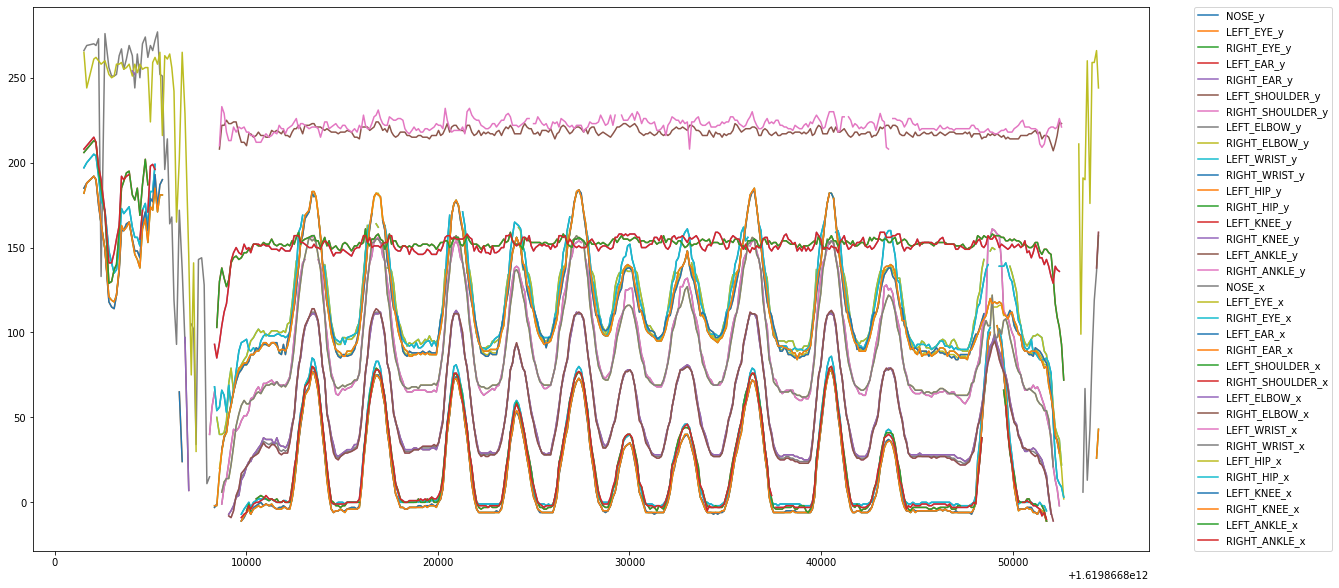

In [18]:
keypoints = ['NOSE','LEFT_EYE','RIGHT_EYE','LEFT_EAR','RIGHT_EAR','LEFT_SHOULDER','RIGHT_SHOULDER','LEFT_ELBOW','RIGHT_ELBOW','LEFT_WRIST','RIGHT_WRIST','LEFT_HIP','RIGHT_HIP','LEFT_KNEE','RIGHT_KNEE','LEFT_ANKLE','RIGHT_ANKLE']
keypoints_x, keypoints_y = [], []


for points in keypoints:
  keypoints_y.append(points + "_y")
  keypoints_x.append(points + "_x")


df_header = ['TIME'] + keypoints_y + keypoints_x
df = pd.read_csv("test_data.txt", index_col=False, names=df_header)

print(df.head())


def normalize(x):
  if (pd.isnull(x)):
    return x
  return int(int(x))

df["TIME"] = df["TIME"].apply(int)
for i in df.columns[1:]:
  df[i] = df[i].apply(normalize)

plt.figure(figsize=(20,10))
for i in df.columns[1:]:
  plt.plot(df["TIME"], df[i], label=str(i))
plt.legend(loc=(1.04,0))

original_df = df

#**Write code to count squat reps and detect wrong reps in which the person did not go enough down (small peaks) while doing the exercise.**

We can see from the above plot that the 'humps' are basically the moments where the person completed a SQUAT. So thereby for counting the total squats we need to formulate a code which counts the number of 'humps' which would be further grouped into two clusters, "proper reps" and "wrong reps". And for counting the number of 'humps' its enough to count the total number of peaks.

# There's a simple approach to this

Let us take in account the y-keypoints ( Nose, eyes... their y-keypoints change drastically during a 'squat' ) cause it gives a sense of vertical variations. Therefore a change in y-keypoints means that a person performed a 'squat'. We'll take the feature which has the least number of missing values, then we will remove the non-periodic part of the 'waveform' and treat it as outliers. After we are done with removing the outliers we will interpolate the missing datas and after that we can find the peaks in the data. Every peak resembles that a squat is performed. Then we will use kmeans to cluster the peaks into 'proper reps' and 'wrong reps'.

In [19]:
# taking the y-keypoints
new_df = df.iloc[:, df.columns.str.endswith('_y')]
new_df = pd.concat([df['TIME'], new_df], axis = 1)
# Missing values
new_df.isnull().sum()

TIME                  0
NOSE_y               57
LEFT_EYE_y           53
RIGHT_EYE_y          53
LEFT_EAR_y           74
RIGHT_EAR_y          70
LEFT_SHOULDER_y      71
RIGHT_SHOULDER_y     73
LEFT_ELBOW_y         68
RIGHT_ELBOW_y        71
LEFT_WRIST_y        136
RIGHT_WRIST_y        99
LEFT_HIP_y           79
RIGHT_HIP_y          65
LEFT_KNEE_y          65
RIGHT_KNEE_y         66
LEFT_ANKLE_y         66
RIGHT_ANKLE_y        72
dtype: int64

# Nose Keypoints

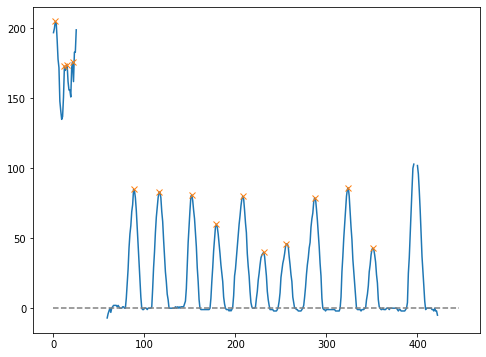

In [20]:
KEY = 'NOSE_y'
plt.figure(figsize=(8,6))
peaks, _ = find_peaks(new_df[KEY], height=10)
plt.plot(new_df[KEY])
plt.plot(peaks, np.array(new_df[KEY])[peaks], "x")
plt.plot(np.zeros_like(new_df[KEY]), "--", color="gray")
plt.show()

# we can see the last hump did not have a peak because it had missing data

# Eye 

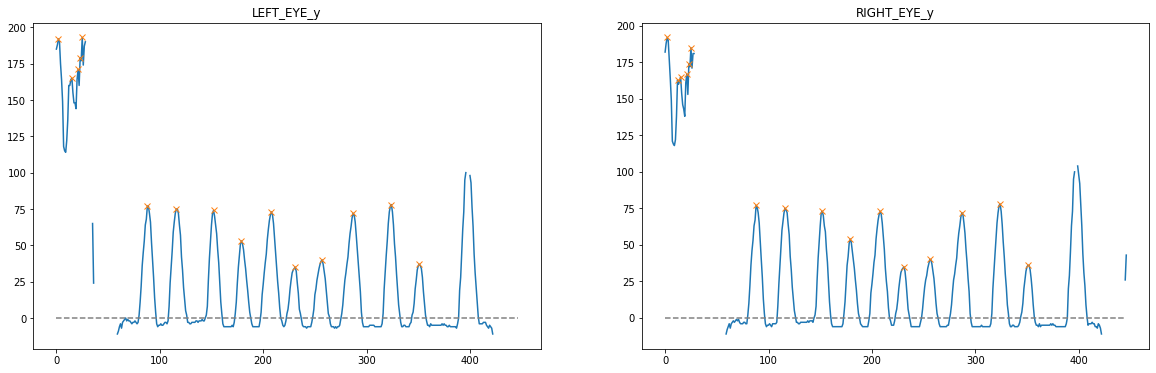

In [21]:
KEY = 'LEFT_EYE_y'
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
peaks, _ = find_peaks(new_df[KEY], height=1)
plt.plot(new_df[KEY])
plt.plot(peaks, np.array(new_df[KEY])[peaks], "x")
plt.plot(np.zeros_like(new_df[KEY]), "--", color="gray")
plt.title(KEY)

KEY = 'RIGHT_EYE_y'
peaks, _ = find_peaks(new_df[KEY], height=10)
plt.subplot(1, 2, 2)
plt.plot(new_df[KEY])
plt.plot(peaks, np.array(new_df[KEY])[peaks], "x")
plt.plot(np.zeros_like(new_df[KEY]), "--", color="gray")
plt.title(KEY)
plt.show()

# Ears

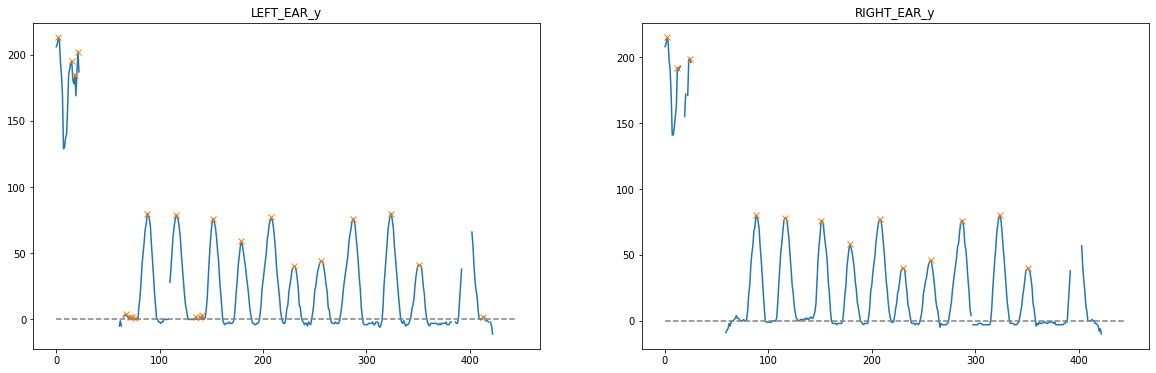

In [22]:
KEY = 'LEFT_EAR_y'
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
peaks, _ = find_peaks(new_df[KEY], height=1)
plt.plot(new_df[KEY])
plt.plot(peaks, np.array(new_df[KEY])[peaks], "x")
plt.plot(np.zeros_like(new_df[KEY]), "--", color="gray")
plt.title(KEY)

KEY = 'RIGHT_EAR_y'
peaks, _ = find_peaks(new_df[KEY], height=10)
plt.subplot(1, 2, 2)
plt.plot(new_df[KEY])
plt.plot(peaks, np.array(new_df[KEY])[peaks], "x")
plt.plot(np.zeros_like(new_df[KEY]), "--", color="gray")
plt.title(KEY)
plt.show()

# Hips

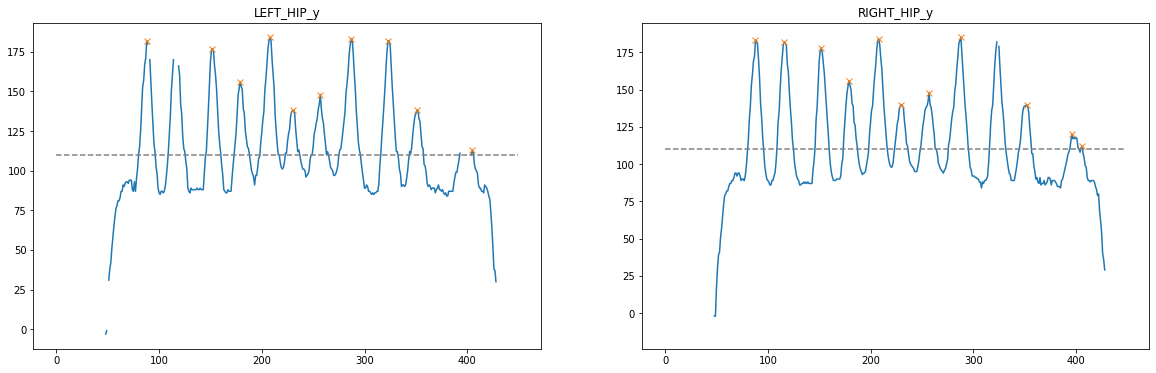

In [23]:
KEY = 'LEFT_HIP_y'
THRES_HEIGHT = 110
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
peaks, _ = find_peaks(new_df[KEY], height=THRES_HEIGHT, distance=10)
plt.plot(new_df[KEY])
plt.plot(peaks, np.array(new_df[KEY])[peaks], "x")
plt.plot(np.array([THRES_HEIGHT]*450), "--", color="gray")
plt.title(KEY)

KEY = 'RIGHT_HIP_y'
peaks, _ = find_peaks(new_df[KEY], height=THRES_HEIGHT, distance=10)
plt.subplot(1, 2, 2)
plt.plot(new_df[KEY])
plt.plot(peaks, np.array(new_df[KEY])[peaks], "x")
plt.plot(np.array([THRES_HEIGHT]*450), "--", color="gray")
plt.title(KEY)
plt.show()

 We can keep on analysing each graph but since Nose has the least number of missing values, we'll proceed with that. After we are done building the code, we will test the validity of the code with other keypoint as input (LEFT_EYE_y). If it produces the same result means the approach is apt.

([<matplotlib.axis.XTick at 0x7fb45ea08410>,
 <a list of 21 Text major ticklabel objects>)

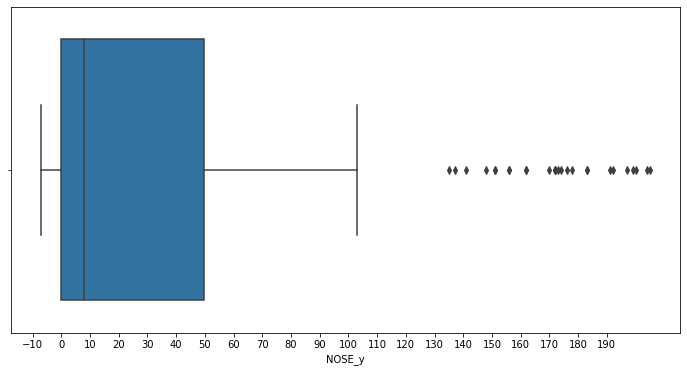

In [24]:
# boxplot for pointing outliers
plt.figure(figsize=(12,6))
sns.boxplot(x=new_df['NOSE_y'])
plt.xticks(np.arange(-10, 200, 10))

In [25]:
# to remove outliers
print(np.where(new_df[KEY]<130)[0])

[ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 215 216 217 218 219 220 221 222 223 224 225 226 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 40

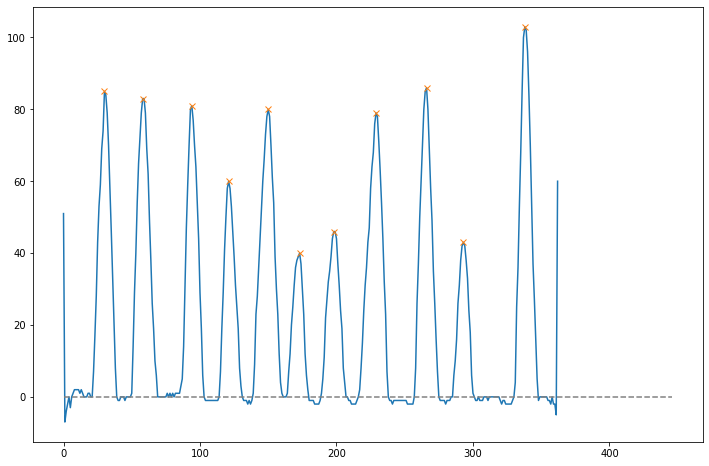

In [26]:
KEY = 'NOSE_y'
plt.figure(figsize=(12, 8))
itpdf = pd.DataFrame(np.array(new_df[KEY])[np.where(new_df[KEY]<130)[0]]).interpolate(method='quadratic')
peaks, _ = find_peaks(itpdf.iloc[:, -1].tolist(), height=10)
plt.plot(itpdf)
plt.plot(peaks, np.array(itpdf)[peaks], "x")
plt.plot(np.zeros_like(new_df[KEY]), "--", color="gray")
plt.show()
# after interpolation
# the red cross resembles peak points

In [27]:
# clustering the peaks into 'proper reps' and 'wrong reps'

arr = np.array(itpdf.iloc[:, -1].tolist())[peaks]
kmeans = KMeans(n_clusters = 2)
preds = kmeans.fit_predict(arr.reshape(-1, 1))

df = pd.DataFrame(
    {
        'y_value': arr,
        'cluster': preds
    }
)

df

,y_value,cluster
0,85.0,0
1,83.0,0
2,81.0,0
3,60.0,1
4,80.0,0
5,40.0,1
6,46.0,1
7,79.0,0
8,86.0,0
9,43.0,1


In [28]:
cluster0_mean = df[df['cluster']==0]['y_value'].mean()
cluster1_mean = df[df['cluster']==1]['y_value'].mean()

if cluster1_mean > cluster0_mean:
    prop_reps = df[df['cluster']==1]['y_value'].count()
    wrong_reps = df[df['cluster']==0]['y_value'].count()
    print('Number of Proper Squat Reps : {}\nNumber of Wrong Squat Reps : {}\n\nNumber of Total Squat Reps : {}'.format(prop_reps, wrong_reps, len(df)))
else:
    prop_reps = df[df['cluster']==0]['y_value'].count()
    wrong_reps = df[df['cluster']==1]['y_value'].count()
    print('Number of Proper Squat Reps : {}\nNumber of Wrong Squat Reps : {}\n\nNumber of Total Squat Reps : {}'.format(prop_reps, wrong_reps, len(df)))

Number of Proper Squat Reps : 7
Number of Wrong Squat Reps : 4

Number of Total Squat Reps : 11


# Testing the code with taking ' LEFT_EYE_y ' as input 

([<matplotlib.axis.XTick at 0x7fb45e996310>,
 <a list of 42 Text major ticklabel objects>)

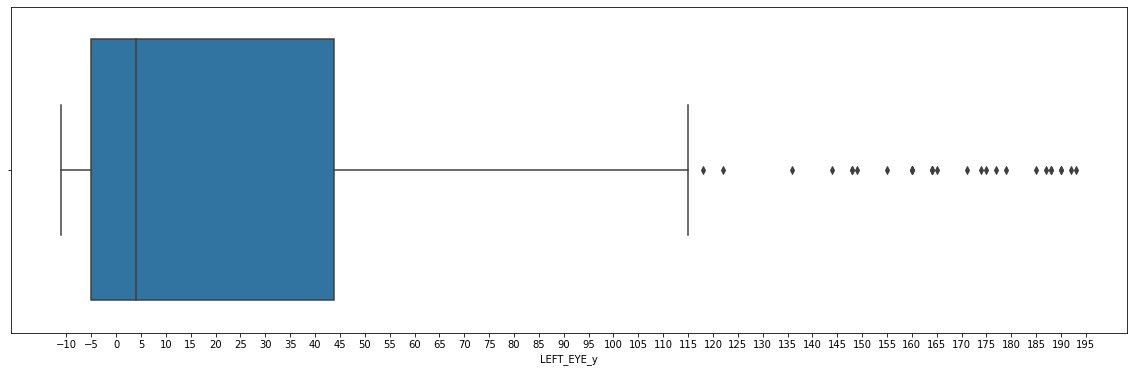

In [29]:
plt.figure(figsize=(20,6))
sns.boxplot(x=new_df['LEFT_EYE_y'])
plt.xticks(np.arange(-10, 200, 5))

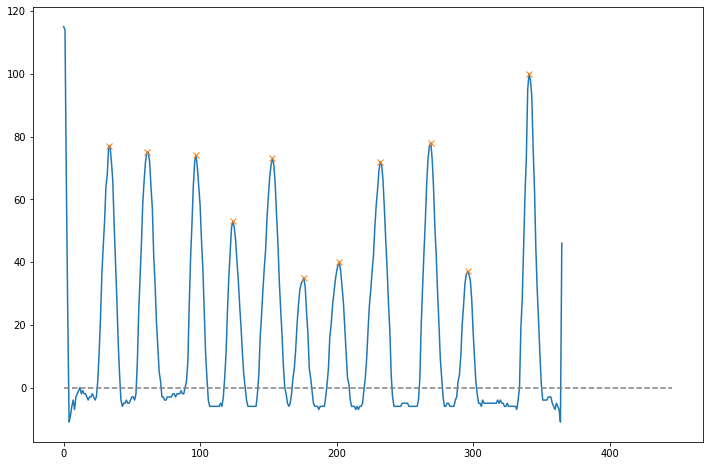


Number of Proper Squat Reps : 7
Number of Wrong Squat Reps : 4

Number of Total Squat Reps : 11


In [30]:
KEY = 'LEFT_EYE_y'
plt.figure(figsize=(12, 8))
itpdf = pd.DataFrame(np.array(new_df[KEY])[np.where(new_df[KEY]<116)[0]]).interpolate(method='quadratic')
peaks, _ = find_peaks(itpdf.iloc[:, -1].tolist(), height=10)
plt.plot(itpdf)
plt.plot(peaks, np.array(itpdf)[peaks], "x")
plt.plot(np.zeros_like(new_df[KEY]), "--", color="gray")
plt.show()

arr = np.array(itpdf.iloc[:, -1].tolist())[peaks]
kmeans = KMeans(n_clusters = 2)
preds = kmeans.fit_predict(arr.reshape(-1, 1))

df = pd.DataFrame(
    {
        'y_value': arr,
        'cluster': preds
    }
)

cluster0_mean = df[df['cluster']==0]['y_value'].mean()
cluster1_mean = df[df['cluster']==1]['y_value'].mean()

if cluster1_mean > cluster0_mean:
    prop_reps = df[df['cluster']==1]['y_value'].count()
    wrong_reps = df[df['cluster']==0]['y_value'].count()
    print('\nNumber of Proper Squat Reps : {}\nNumber of Wrong Squat Reps : {}\n\nNumber of Total Squat Reps : {}'.format(prop_reps, wrong_reps, len(df)))
else:
    prop_reps = df[df['cluster']==0]['y_value'].count()
    wrong_reps = df[df['cluster']==1]['y_value'].count()
    print('\nNumber of Proper Squat Reps : {}\nNumber of Wrong Squat Reps : {}\n\nNumber of Total Squat Reps : {}'.format(prop_reps, wrong_reps, len(df)))

# We got the same results